In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.layers import Dense
import matplotlib.colors as colors
import os
wells = []
##global scope variable for the path to where all the well data is stored
_PATH = "Data/"

Using TensorFlow backend.
C:\Users\alex2\Anaconda3\envs\energyanalytics\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\alex2\Anaconda3\envs\energyanalytics\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\alex2\Anaconda3\envs\energyanalytics\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\alex2\An

# <span style="color:blue">This is a well class that will hold all the properties of a well and also will be able to perform relevant calculations for a given well</span>

In [2]:
class Well:
    ##This is a well class that will hold all the properties of a well
    ##and also will be able to do relevant calculations for a given well
    
    ##Once the data is set in the constructor, please do not change the values when they are accessed.
    ##Apparently I can't prevent this in Python, but I can at least advise against it.
    
    def __init__(self, easting, northing, porosity, permeability, PR, YM, wSaturation, oSaturation, thickness, proppant,
                 pumpRate, name, RF, Pa, FVF, oilByMonth, waterByMonth):
        self.easting = easting ##easting, areas with higher
        self.northing = northing ##northing, areas with higher
        self.porosity = porosity ##porosity, definitely something there
        self.permeability = permeability ##permeability,definitely something there
        self.PR = PR ##poissons's ratio, might be something. couple of outliers but general convergence
        self.YM = YM ##young's modulus, pyramid shape, probably something
        self.wSaturation = wSaturation ##water saturation, no correlation to production
        self.oSaturation = oSaturation ##oil saturation, no correlation to production
        self.thickness = thickness ##thickness, no correlation to production
        self.proppant = proppant ##proppant weight, maybe a correlation
        self.pumpRate = pumpRate ##pumpRate, probably a correlation
        self.name = name ##name
        self.RF = RF ##recovery factor, maybe something
        self.Pa = Pa ##average pressure, probably something
        self.FVF = FVF ##formation volume factor
        self.oilByMonth = oilByMonth ##oil produced in each month
        self.waterByMonth = waterByMonth ##water produced in each month
    
    ##returns the length of the well
    def getWellLength(self):
        return self.easting.max()-self.easting.min()
    
    #returns the total oil produced by the well
    def getTotalProduction(self):
        return self.oilByMonth.sum()
    
    ##returns the oil in place for this given well
    def getOilInPlace(self):
        return ((7758 * 360 * self.thickness.mean() * self.porosity.mean() * (1 - self.wSaturation.mean())) / self.FVF)
    
    ##returns the recoverable reserves of this well
    def getRecoverableReserves(self):
        return (self.getOilInPlace() * self.RF)
    
    ##Returns the production rate
    def InitialProduction(self):
        return (self.oilByMonth[0] * (math.exp((-1 * ((self.oilByMonth[11] - self.oilByMonth[0]) / 12) * time))))
        ##need to figure out how to plug in time (otherwise it will always equal first month production). also could be used
        ##to find the decline over time (where time is difference in production)
    
    ##Returns the economic limit of production
    def economicLimitROP(self):
        sumOilProduction = 0 
        for i in range(12):
            oil = getOilAtMonth(self, i)
            water = getWaterAtMonth(self, i)
            sumOilProduction += oil
            if(oil < water):
                return sumOilProduction
    
    ##Returns time in years
    def LifeOfReservoir(self):
        return ((1 / ((self.oilByMonth[11] - self.oilByMonth[0]) / 12)) * math.log((self.oilbyMonth[0]) / economicLimitROP(self)))
    
    ##Returns cumulative production in bbl
    def CumulativeProduction(self):
        return ((self.oilbyMonth[0] / declineRate) * math.log(self.oilbyMonth[0] / self.oilbyMonth[11]))
    
    ##this is the kind of functioning as a toString right now, almost no reason for it
    def getName(self):
        return self.name
    
    ##method to return oil produced in a given month
    def getOilAtMonth(self, n):
        if n > 12 or n < 1:
            ##bad
            return -1
        else:
            return self.oilByMonth[n]
    
    ##method to return water produced in a given month
    def getOilAtMonth(self, n):
        if n > 12 or n < 1:
            ##bad
            return -1
        else:
            return self.waterByMonth[n]
    
    ##method to display data for this well
    ##depth will be for getiing data at a given depth in a well. Not sure if or when I should implement this
    def displayData(self, depth = 0):
        if depth == 0:
            data = pd.read_csv(_PATH + self.name + ".csv")
        else:
            data = pd.read_csv(_PATH + self.name + ".csv")
            
        print("Displaying data for: " + self.name)
        print(data)
    
    ##Returns the number of frac stages for a well
    def getFracStages(self):
        count = 0
        for rate in self.pumpRate:
            if (pd.notnull(rate)):
                count+=1
        return count
    
    ##Returns the mean pump rate of a well
    def getAvgPumpRate(self):
        return self.pumpRate.mean(skipna = True)
    
    ##Returns the mean amount of proppant used in a well
    def getAvgProppant(self):
        return self.proppant.mean(skipna = True)
    
    ##Returns the mean easting coordinate value of a well
    def eastingAvg(self):
        return np.array(self.easting).mean()
    
    ##Returns the mean northing coordinate value of a well
    def northingAvg(self):
        return np.array(self.northing).mean()
    
    ##Returns the mean porosity value of a well
    def porosityAvg(self):
        return np.array(self.porosity).mean()
    
    ##Returns the mean permeability value of a well
    def permeabilityAvg(self):
        return np.array(self.permeability).mean()

    ##method to take the data given, create a well object and store it in wells
def createWells():
    wellProduction = pd.read_csv(_PATH + "well production.csv")
    for i in range(100):
    ##for every well
        ##get all the data from the well production csv
        name = wellProduction.at[i, "well name"]
        ap = wellProduction.at[i, "average pressure (Pa)"]
        RF = wellProduction.at[i, "recovery factor"]
        FVF = wellProduction.at[i, "formation volume factor"]
        oil = wellProduction.iloc[i, 4:16] ##oil per month
        water = wellProduction.iloc[i, 16:28] ##water per month
        ##now that we have the name of the well, we can use that to access its
        ##own csv file and get that data
        wellDF = pd.read_csv(_PATH + name + ".csv")
        e = wellDF["easting"]
        n = wellDF["northing"]
        p = wellDF["porosity"]
        perm = wellDF["permeability"]
        pr = wellDF["Poisson's ratio"]
        ym = wellDF["Young's Modulus"]
        ws = wellDF["water saturation"]
        os = wellDF["oil saturation"]
        thick = wellDF["thickness (ft)"]
        prop = wellDF["proppant weight (lbs)"]
        pump = wellDF["pump rate (cubic feet/min)"]
        ##create a new well
        temp = Well(e, n, p, perm, pr, ym, ws, os, thick, prop, pump, name, RF, ap, FVF, oil, water)
        ##append the new well to the list
        wells.append(temp)


In [3]:
createWells()

# <span style="color:blue">This is a generalized function that facilitates easy graphing of any 2 variables</span> 

In [4]:
bottom = cm.get_cmap('Oranges', 128)
newcolors = np.vstack((bottom(np.linspace(0, 1, 128))))[32:127]
newcmp = ListedColormap(newcolors, name='DarkerOrange')

def makeGraph(xProp, xIsMethod, yProp, yIsMethod, xLabel, yLabel, zProp=-1, zIsMethod=-1, zRepeat=1, zLabel=""):
    #Graph anything
    xCoords = []
    yCoords = []
    zCoords = []
    for well in wells:
        xAttr = getattr(well, xProp)
        yAttr = getattr(well, yProp)
        zAttr = getattr(well, zProp) if zProp is not -1 else -1
        xCoords.append(xAttr() if xIsMethod else xAttr)
        yCoords.append(yAttr() if yIsMethod else yAttr)
        zCoords.append(zAttr() if zIsMethod else zAttr) if zAttr is not -1 else -1
    xCoords = np.array(xCoords).reshape(-1)
    yCoords = np.array(yCoords).reshape(-1)
    zCoords = np.array(zCoords).repeat(zRepeat).reshape(-1)
    plt.figure(dpi=100)
    if zAttr is -1:
        plt.scatter(xCoords, yCoords, s = 4)
    else:
        plt.scatter(xCoords, yCoords, s = 4, c=zCoords, cmap=newcmp)
        plt.colorbar().set_label(zLabel)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)

# <span style="color:blue">Total Production (bbl) vs Easting (ft)</span>

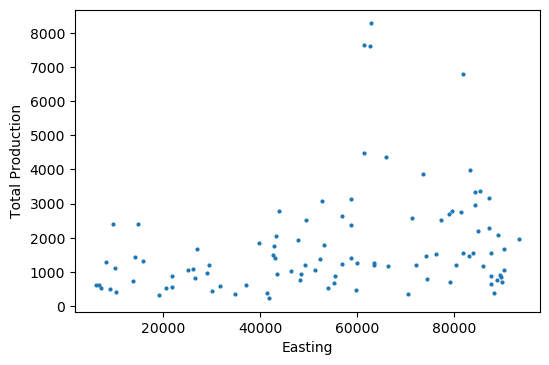

In [5]:
makeGraph("eastingAvg", True, "getTotalProduction", True, "Easting", "Total Production")

# <span style="color:blue">Total Production (bbl) vs Northing (ft)</span>

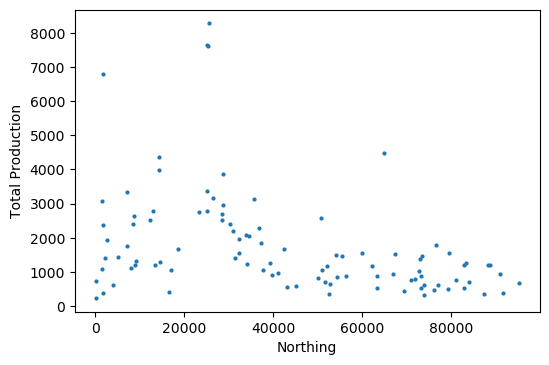

In [6]:
makeGraph("northingAvg", True, "getTotalProduction", True, "Northing", "Total Production")

# <span style="color:blue">Location of wells colored by Permeability 

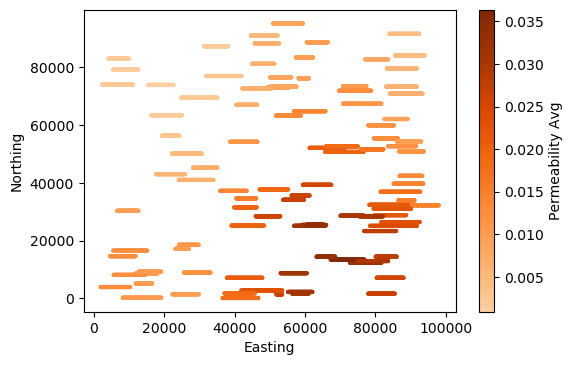

In [7]:
makeGraph("easting", False, "northing", False, "Easting", "Northing", zProp="permeabilityAvg", zIsMethod=True, zRepeat=100, zLabel="Permeability Avg")

# <span style="color:blue">Location of wells colored by Total Production (bbl)</span>

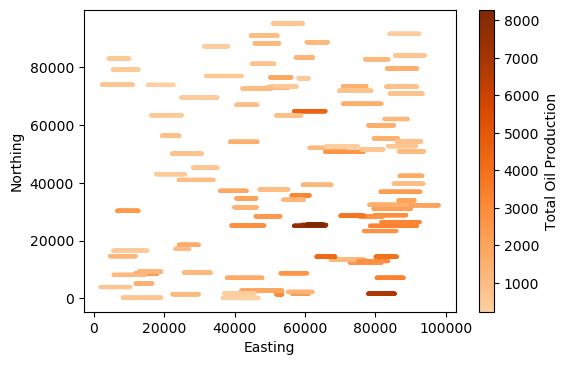

In [8]:
makeGraph("easting", False, "northing", False, "Easting", "Northing", zProp="getTotalProduction", zIsMethod=True, zRepeat=100, zLabel="Total Oil Production")

# <span style="color:blue">Total Production (bbl) vs Well Length (ft)</span>

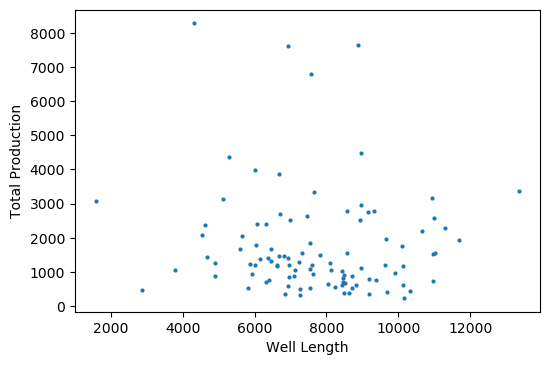

In [9]:
makeGraph("getWellLength", True, "getTotalProduction", True, "Well Length", "Total Production")

# <span style="color:blue">Frequency Plot of Well Lengths (ft)</span>

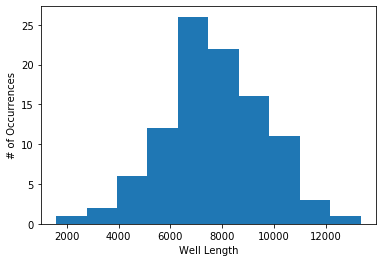

In [10]:
lengths = []
for well in wells:
    lengths.append(well.getWellLength())
plt.hist(lengths);
plt.xlabel("Well Length")
plt.ylabel("# of Occurrences");

# <span style="color:blue">Total Production (bbl) vs Mean Pump Rate (ft<sup>3</sup>/min)</span>

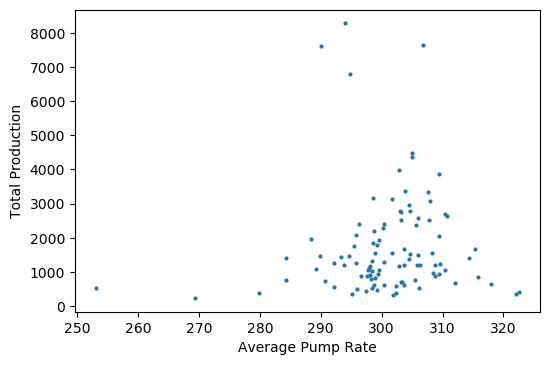

In [11]:
makeGraph("getAvgPumpRate", True, "getTotalProduction", True, "Average Pump Rate", "Total Production")

# <span style="color:blue">Total Production (bbl) vs Mean Proppant (lbs)</span>

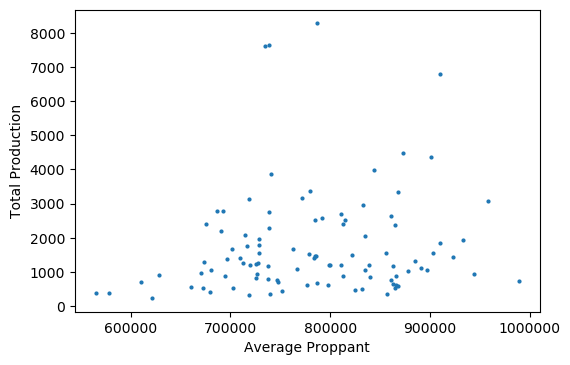

In [12]:
makeGraph("getAvgProppant", True, "getTotalProduction", True, "Average Proppant", "Total Production")

# <span style="color:blue">Total Production (bbl) vs Number of Frac Stages</span>

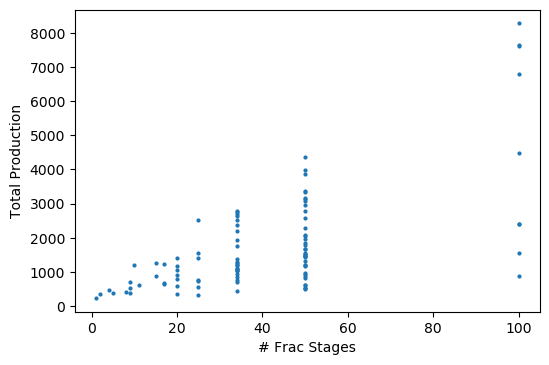

In [13]:
makeGraph("getFracStages", True, "getTotalProduction", True, "# Frac Stages", "Total Production")

# <span style="color:blue">Getting Top Outline Points</span>


In [14]:
def sparseMax2(xCoords1, yCoords1, sparseness):
    newX = []
    newY = []
    xRange = max(xCoords1)-min(xCoords1)
    width = xRange/sparseness
    lastUpper = 0
    for i in range(sparseness):
        lower = min(xCoords1) + width*i
        upper = min(xCoords1) + width*(i+1)

        maxN = -1
        maxInd = -1
        for j in range(len(xCoords1)):
            if (xCoords1[j] >= lower and xCoords1[j] < upper):
                if (yCoords1[j] > maxN):
                    maxN = yCoords1[j]
                    maxInd = j
                    
        if (maxInd != -1):
            newX.append(xCoords1[maxInd])
            newY.append(yCoords1[maxInd])
        lastUpper = upper
    
    newX.append(xCoords1[len(xCoords1)-1])
    newY.append(yCoords1[len(yCoords1)-1]) 
    
    return [newX, newY]
        

def removeOutliers(xCoords, yCoords):
    newX = []
    newY = []
    q1 = py.quantile(yCoords, 0.25)
    q3 = py.quantile(yCoords, 0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    for i in range(len(yCoords)):
        if (yCoords[i] > lower and yCoords[i] < upper):
            newX.append(xCoords[i])
            newY.append(yCoords[i])
    return [newX, newY]

def getMaxLists(xCoords, yCoords):
    xCoords1 = []
    for val in xCoords:
        xCoords1.append(val)
    yCoords1 = [x for _,x in sorted(zip(xCoords,yCoords))]
    xCoords1.sort()
    #listA = removeOutliers(xCoords1, yCoords1)
    listA = [xCoords1, yCoords1]
    listZ = sparseMax2(listA[0], listA[1], 20)
    return listZ

Text(0, 0.5, 'Total Production')

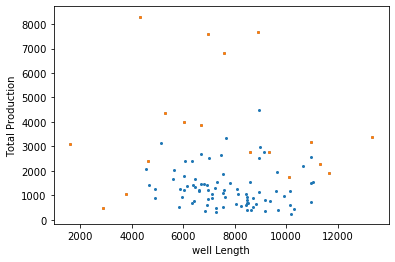

In [15]:
#Graph well length vs total production
xCoords = []
yCoords = []
for well in wells:
    xCoords.append(well.getWellLength())
    yCoords.append(well.getTotalProduction())

lengthMax = getMaxLists(xCoords, yCoords)

plt.scatter(xCoords, yCoords, s = 4)
plt.scatter(lengthMax[0], lengthMax[1], s = 4)
plt.xlabel("well Length")
plt.ylabel("Total Production")

# <span style="color:blue">Graph Frac stages vs Total Production</span>

Text(0, 0.5, 'Total Production')

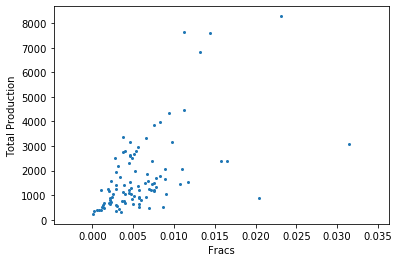

In [16]:
xCoords = []
yCoords = []
for well in wells:
    xCoords.append(well.getFracStages()/well.getWellLength())
    yCoords.append(well.getTotalProduction())

fracMax = getMaxLists(xCoords, yCoords)

plt.scatter(xCoords, yCoords, s = 4)
#plt.scatter(fracMax[0], fracMax[1], s = 4)
plt.xlabel("Fracs")
plt.ylabel("Total Production")

# <span style="color:blue">Graph Proppant vs Total Production</span>


Text(0, 0.5, 'Total Production')

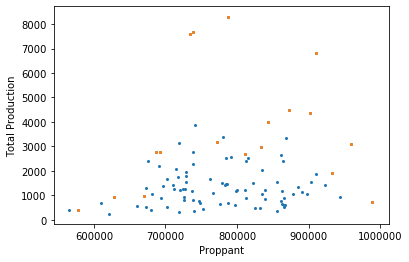

In [17]:
xCoords = []
yCoords = []
for well in wells:
    xCoords.append(well.getAvgProppant())
    yCoords.append(well.getTotalProduction())

propMax = getMaxLists(xCoords, yCoords)

plt.scatter(xCoords, yCoords, s = 4)
plt.scatter(propMax[0], propMax[1], s = 4)
plt.xlabel("Proppant")
plt.ylabel("Total Production")

# <span style="color:blue">Graph Pump Rate vs Total Production</span>

Text(0, 0.5, 'Total Production')

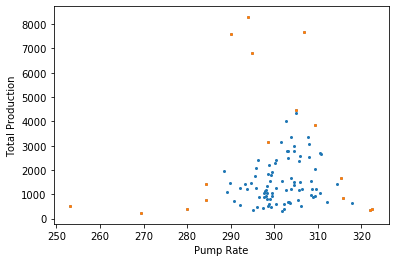

In [18]:
xCoords = []
yCoords = []
for well in wells:
    xCoords.append(well.getAvgPumpRate())
    yCoords.append(well.getTotalProduction())

pumpMax = getMaxLists(xCoords, yCoords)

plt.scatter(xCoords, yCoords, s = 4)
plt.scatter(pumpMax[0], pumpMax[1], s = 4)
plt.xlabel("Pump Rate")
plt.ylabel("Total Production")

# <span style="color:blue">Function to show Data vs Fit for Production vs Well Length</span>

[5177.4181749  7351.87859253 2817.67852885]
Since we used the Gaussian curve as our fit, the x value at the max y value is simply the optimized x0 value : 7352


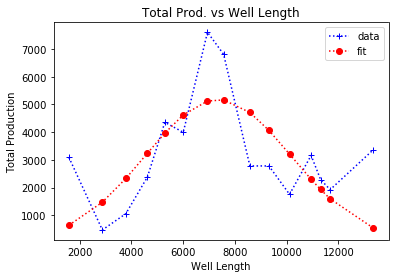

In [19]:
import pylab as plb
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
x1 = []
for val in lengthMax[0]:
    x1.append(val)
y1 = []
for val in lengthMax[1]:
    y1.append(val)
    
# only this one necessarily had to have outliers removed so that the optimizer would converge
del x1[11]
del x1[7]
del x1[3]
del y1[11]
del y1[7]
del y1[3]

x = ar(x1)
y = ar(y1)

n = len(x)                          
mean = sum(x*y)/n                   
sigma = np.sqrt(sum(y*(x-mean)**2)/sum(y))

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[max(y),mean,sigma])
print(popt)
print("Since we used the Gaussian curve as our fit, the x value at the max y value is simply the optimized x0 value : 7352")
plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x, popt[0], popt[1], popt[2]),'ro:',label='fit')
plt.legend()
plt.title('Total Prod. vs Well Length')
plt.xlabel('Well Length')
plt.ylabel('Total Production')
plt.show()

# <span style="color:blue">Function to show Data vs Fit for Production vs Pump Proppant</span>

[  5436.02613826 804422.28096613 116226.13286051]
Since we used the Gaussian curve as our fit, the x value at the max y value is simply the optimized x0 value : 804422


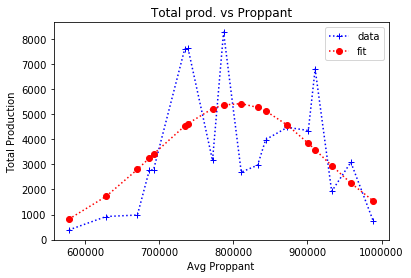

In [20]:
x1 = []
for val in propMax[0]:
    x1.append(val)
y1 = []
for val in propMax[1]:
    y1.append(val)

x = ar(x1)
y = ar(y1)

n = len(x)                          
mean = sum(x*y)/n                  
sigma = np.sqrt(sum(y*(x-mean)**2)/sum(y))        

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[max(y),mean,sigma])
print(popt)
print("Since we used the Gaussian curve as our fit, the x value at the max y value is simply the optimized x0 value : 804422")
plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x, popt[0], popt[1], popt[2]),'ro:',label='fit')
plt.legend()
plt.title('Total prod. vs Proppant')
plt.xlabel('Avg Proppant')
plt.ylabel('Total Production')
plt.show()

# <span style="color:blue">Function to show Data vs Fit for Production vs Pump Rate</span>

[6983.18187489  298.45648342    9.83211534]
Since we used the Gaussian curve as our fit, the x value at the max y value is simply the optimized x0 value : 298


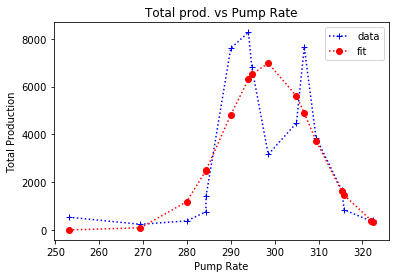

In [21]:
x1 = []
for val in pumpMax[0]:
    x1.append(val)
y1 = []
for val in pumpMax[1]:
    y1.append(val)

x = ar(x1)
y = ar(y1)

n = len(x)      
mean = sum(x*y)/n                 
sigma = np.sqrt(sum(y*(x-mean)**2)/sum(y)) 

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[max(y),mean,sigma])
print(popt)
print("Since we used the Gaussian curve as our fit, the x value at the max y value is simply the optimized x0 value : 298")
plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x, popt[0], popt[1], popt[2]),'ro:',label='fit')
plt.legend()
plt.title('Total prod. vs Pump Rate')
plt.xlabel('Pump Rate')
plt.ylabel('Total Production')
plt.show()

# <span style="color:blue">Location of wells colored by Pump Rate (ft<sup>3</sup>/min)</span>

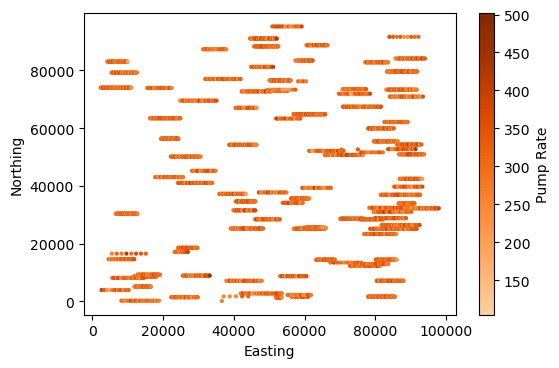

In [22]:
makeGraph("easting", False, "northing", False, "Easting", "Northing", zProp="pumpRate", zIsMethod=False, zLabel="Pump Rate")

# <span style="color:blue">Total Production (bbl) vs Mean Porosity</span>

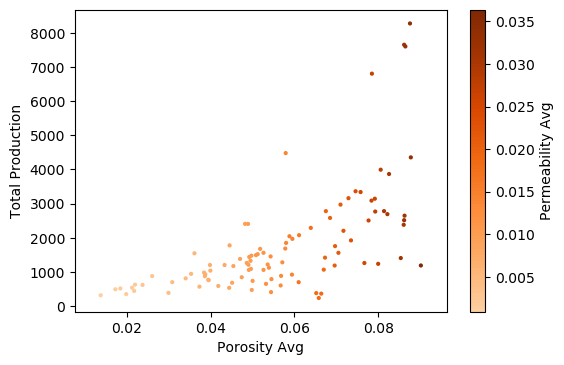

In [23]:
makeGraph("porosityAvg", True, "getTotalProduction", True, "Porosity Avg", "Total Production", zProp="permeabilityAvg", zIsMethod=True, zLabel="Permeability Avg")

# <span style="color:blue">Location of wells colored by Porosity</span>

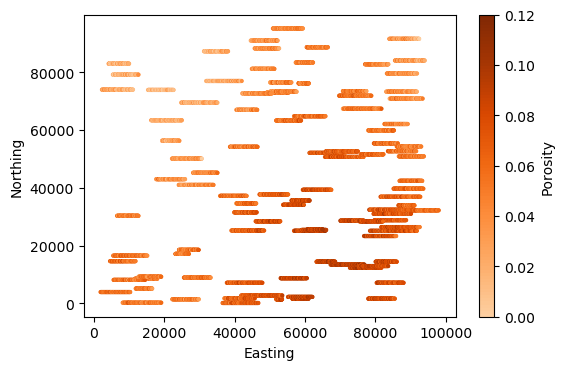

In [24]:
makeGraph("easting", False, "northing", False, "Easting", "Northing", zProp="porosity", zIsMethod=False, zLabel="Porosity")

# <span style="color:blue">Making the 10 optimal wells</span>

In [25]:
addedWells = [
    np.linspace([86430, 5000], [95430, 5000], 100),
    np.linspace([66000, 2000], [76000, 2000], 100),
    np.linspace([85500, 19500], [90500, 19500], 100),
    np.linspace([71500, 20275], [76000, 20275], 100),
    np.linspace([59750, 20750], [64250, 20750], 100),
    np.linspace([64000, 22500], [70500, 22500], 100),
    np.linspace([63000, 33500], [69000, 33500], 100),
    np.linspace([4125, 26000], [11875, 26000], 100),
    np.linspace([53000, 59250], [64750, 59250], 100),
    np.linspace([63750, 64750], [74250, 64750], 100)
]
addedWellClasses = [Well(adde[:,0], adde[:,1], None, None, None, None, None, None, None, None,
                 None, None, None, None, 1.6, None, None) for adde in addedWells]

# <span style="color:blue">Making the Neural Network</span>

In [26]:
class NNetwork:
    def parseData(self, targetProperty, isTargetMethod, yLabel, yRepeat=1):
        self.yLabel = yLabel
        self.X = np.array([np.array([well.easting, well.northing]).transpose() for well in wells]).reshape(-1,2)
        self.y = np.array([np.array(getattr(well, targetProperty)).repeat(yRepeat) for well in wells]).reshape(-1)
        
        self.X = self.X[::25]
        self.y = self.y[::25]

        if isTargetMethod:
            self.y = np.array([a() for a in self.y])

        self.scalarX = MinMaxScaler()
        self.scalarX.fit(self.X)
        self.Xfit = self.scalarX.transform(self.X)
        self.scalarY = MinMaxScaler()
        self.scalarY.fit(self.y.reshape(-1,1))
        self.yfit = self.scalarY.transform(self.y.reshape(-1,1)).reshape(-1)

    def train(self):
        # Definition of our model
        self.model = keras.Sequential() # as first layer in a sequential model:
        # let's define our model:
        self.model.add( keras.layers.Dense( units=30, input_shape=(2,), activation="relu" ) )
        self.model.add( keras.layers.Dense( units=15, input_shape=(30,), activation="relu" ) )
        self.model.add( keras.layers.Dense( units=15, input_shape=(15,), activation="relu" ) )
        self.model.add( keras.layers.Dense( units=1, input_shape=(15,), activation="linear" ) )
        optimizer = keras.optimizers.Adam()
        self.model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
        self.model.fit(self.Xfit, self.yfit, epochs=3000, verbose=1, batch_size=200, validation_split = 0.1)

        
    def plotSimple(self):
        testX0 = np.linspace(min(self.Xfit[:,0]), max(self.Xfit[:,0]), 50)
        testX1 = np.linspace(min(self.Xfit[:,1]), max(self.Xfit[:,1]), 50)
        grid0, grid1 = np.meshgrid(testX0, testX1)
        cost = np.array([self.model.predict(np.array([grid0[i], grid1[i]]).transpose()).reshape(-1) for i in range(len(grid0))])
        plt.pcolormesh(grid0,grid1,cost, norm=colors.SymLogNorm(linthresh=10, linscale=1,
                                                  vmin=cost.min(), vmax=cost.max()))
        plt.scatter(self.Xfit[:,0], self.Xfit[:,1], c = self.yfit)
        plt.scatter(np.array([self.scalarX.transform(addedWell)[:,0] for addedWell in addedWells]).reshape(-1), np.array([self.scalarX.transform(addedWell)[:,1] for addedWell in addedWells]).reshape(-1), c="#A00000")
        plt.colorbar().set_label(self.yLabel)
        plt.xlabel("Easting")
        plt.ylabel("Northing")
        plt.show()
        
    # Doesn't work properly yet - don't use ATM
    def plotAdvanced(self):
        testX0 = np.linspace(min(self.Xfit[:,0]), max(self.Xfit[:,0]), 50)
        testX1 = np.linspace(min(self.Xfit[:,1]), max(self.Xfit[:,1]), 50)
        grid0, grid1 = np.meshgrid(testX0, testX1)
        cost = np.array([self.model.predict(np.array([grid0[i], grid1[i]]).transpose()).reshape(-1) for i in range(len(grid0))])
        
        cost = self.scalarY.inverse_transform(cost)
        
        reset = self.scalarX.inverse_transform(np.array([testX0, testX1]).transpose())
        testX00 = reset[:,0]
        testX01 = reset[:,1]
        grid0, grid1 = np.meshgrid(testX00, testX01)
        
        plt.pcolormesh(grid0,grid1,cost, norm=colors.SymLogNorm(linthresh=10, linscale=1,
                                                  vmin=cost.min(), vmax=cost.max()))
        plt.scatter(self.X[:,0], self.X[:,1], c = self.y)
        plt.colorbar().set_label(self.yLabel)
        plt.xlabel("Easting")
        plt.ylabel("Northing")
        plt.show()
        
    def getNetwork(self):
        return (self.model, self.scalarX, self.scalarY)

In [27]:
porosityNet = NNetwork()
thicknessNet = NNetwork()
wSaturationNet = NNetwork()
RFNet = NNetwork()
totalOilNet = NNetwork()

porosityNet.parseData("porosity", False, "Porosity")
thicknessNet.parseData("thickness", False, "Thickness")
wSaturationNet.parseData("wSaturation", False, "Water Saturation")
RFNet.parseData("RF", False, "Recovery Factor", yRepeat=100)
totalOilNet.parseData("getTotalProduction", True, "Total Oil Production", yRepeat=100)

# <span style="color:blue">Training the Neural Network</span>

In [28]:
#our error metric is the loss metric (mean-squared error)
porosityNet.train()
thicknessNet.train()
wSaturationNet.train()
RFNet.train()
totalOilNet.train()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 360 samples, validate on 40 samples
Epoch 1/3000
360/360 [==============================] - 0s 577us/step - loss: 0.1561 - mean_squared_error: 0.1561 - val_loss: 0.2446 - val_mean_squared_error: 0.2446
Epoch 2/3000
360/360 [==============================] - 0s 8us/step - loss: 0.1417 - mean_squared_error: 0.1417 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 3/3000
360/360 [==============================] - 0s 8us/step - loss: 0.1285 - mean_squared_error: 0.1285 - val_loss: 0.2083 - val_mean_squared_error: 0.2083
Epoch 4/3000
360/360 [==============================] - 0s 8us/step - loss: 0.1165 - mean_squared_error: 0.1165 - val_loss: 0.1918 - val_mean_squared_error: 0.1918
Epoch 5/3000
360/360 [==============================] - 0s 11us/step - loss: 0.1066 - mean_squared_error: 0.1066 - val_loss: 0.1768 - val_mean_squared_error: 0.1768
Epoch 6/3000

360/360 [==============================] - 0s 8us/step - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 47/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 48/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 49/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 50/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 51/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 52/3000
360/360 [

360/360 [==============================] - 0s 11us/step - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0225 - val_mean_squared_error: 0.0225
Epoch 96/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 97/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 98/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 99/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 100/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 101/3000
360/36

360/360 [==============================] - 0s 8us/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch 145/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 146/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch 147/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
Epoch 148/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0213 - val_mean_squared_error: 0.0213
Epoch 149/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
Epoch 150/3000


360/360 [==============================] - 0s 14us/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 194/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0180 - val_mean_squared_error: 0.0180
Epoch 195/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0180 - val_mean_squared_error: 0.0180
Epoch 196/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 197/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 198/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 199/3000

360/360 [==============================] - 0s 8us/step - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 243/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 244/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 245/3000
360/360 [==============================] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.01 - 0s 8us/step - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 246/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 247/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0164

360/360 [==============================] - 0s 11us/step - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 292/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 293/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 294/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 295/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 296/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 297/3000


360/360 [==============================] - 0s 11us/step - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 341/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 342/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 343/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 344/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 345/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 346/3000

Epoch 389/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 390/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 391/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 392/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 393/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 394/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0134 - val_mean_squared_error: 0.0134


360/360 [==============================] - 0s 14us/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 439/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 440/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 441/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 442/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 443/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 444/3000

360/360 [==============================] - 0s 11us/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 487/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 488/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 489/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 490/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 491/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 492/3000

360/360 [==============================] - 0s 8us/step - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 536/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 537/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 538/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 539/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 540/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 541/3000

Epoch 584/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 585/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 586/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 587/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 588/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 589/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0134 - val_mean_squared_error: 0.0134


360/360 [==============================] - 0s 11us/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 634/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 635/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 636/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 637/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 638/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 639/3000


360/360 [==============================] - 0s 8us/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 683/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 684/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 685/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 686/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 687/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 688/3000
360

360/360 [==============================] - 0s 11us/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 732/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 733/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 734/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 735/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 736/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 737/3000
36

360/360 [==============================] - 0s 8us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 781/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 782/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 783/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 784/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 785/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 786/3000
36

360/360 [==============================] - 0s 11us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 830/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 831/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 832/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 833/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 834/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 835/3000
3

Epoch 878/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 879/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 880/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 881/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 882/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 883/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0131 - val_mean_squared_error: 0.0131


360/360 [==============================] - 0s 11us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 928/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 929/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 930/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 931/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 932/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 933/3000


Epoch 976/3000
360/360 [==============================] - 0s 6us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 977/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 978/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 979/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 980/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 981/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Ep

360/360 [==============================] - 0s 14us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 1026/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 1027/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 1028/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 1029/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 1030/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 103

Epoch 1074/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 1075/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 1076/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 1077/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 1078/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 1079/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0135 - val_mean_squared_error: 0

Epoch 1123/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 1124/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 1125/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 1126/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 1127/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 1128/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0133 - val_mean_squared_error: 

Epoch 1172/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 1173/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 1174/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 1175/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 1176/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 1177/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0144 - val_mean_squared_error: 0.01

Epoch 1221/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 1222/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 1223/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 1224/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 1225/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 1226/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0135 - val_mean_squared_error: 

360/360 [==============================] - 0s 8us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 1270/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 1271/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 1272/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 1273/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 1274/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 1275/30

360/360 [==============================] - 0s 11us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 1319/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 1320/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 1321/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 1322/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 1323/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 1324/

Epoch 1367/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 1368/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 1369/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 1370/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 1371/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 1372/3000
360/360 [==============================] - 0s 33us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0133 - val_mean_squared_error: 0.0

Epoch 1416/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 1417/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 1418/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 1419/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 1420/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 1421/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0142 - val_mean_squared_error: 0

360/360 [==============================] - 0s 11us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 1465/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 1466/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 1467/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 1468/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 1469/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 1470/3

360/360 [==============================] - 0s 11us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 1514/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 1515/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 1516/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 1517/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 1518/3000
360/360 [==============================] - 0s 6us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 1519/

Epoch 1562/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 1563/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 1564/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 1565/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 1566/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 1567/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0136 - val_mean_squared_error: 0.

Epoch 1611/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 1612/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 1613/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 1614/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 1615/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 1616/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0140 - val_mean_squared_error: 0.

Epoch 1660/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 1661/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 1662/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 1663/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 1664/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 1665/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0140 - val_mean_squared_error: 0.

Epoch 1709/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 1710/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 1711/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 1712/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 1713/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 1714/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0145 - val_mean_squared_error: 0.

Epoch 1758/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 1759/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 1760/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 1761/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 1762/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 1763/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0143 - val_mean_squared_error: 0.0

Epoch 1807/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 1808/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 1809/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 1810/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 1811/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 1812/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0139 - val_mean_squared_error: 0.0

360/360 [==============================] - 0s 8us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 1856/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 1857/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 1858/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 1859/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 1860/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 1861/

360/360 [==============================] - 0s 8us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 1905/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 1906/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 1907/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 1908/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 1909/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 1910/3

Epoch 1953/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 1954/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 1955/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 1956/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 1957/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 1958/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0145 - val_mean_squared_error: 

Epoch 2002/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 2003/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 2004/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 2005/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 2006/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 2007/3000
360/360 [==============================] - 0s 6us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0145 - val_mean_squared_error: 0.014

Epoch 2051/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 2052/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 2053/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 2054/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 2055/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 2056/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0141 - val_mean_squared_error: 0.

Epoch 2100/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 2101/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 2102/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 2103/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 2104/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 2105/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0148 - val_mean_squared_error: 0.0

Epoch 2149/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 2150/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 2151/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 2152/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 2153/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 2154/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0148 - val_mean_squared_error: 0.01

Epoch 2198/3000
360/360 [==============================] - 0s 6us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 2199/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 2200/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 2201/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 2202/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 2203/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0145 - val_mean_squared_error: 0.01

Epoch 2247/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 2248/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 2249/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 2250/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 2251/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 2252/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0145 - val_mean_squared_error: 0.0

360/360 [==============================] - 0s 8us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 2296/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 2297/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 2298/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 2299/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 2300/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 2301/3

Epoch 2344/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 2345/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 2346/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 2347/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 2348/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 2349/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0155 - val_mean_squared_error: 0.01

Epoch 2393/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 2394/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 2395/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 2396/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 2397/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 2398/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0145 - val_mean_squared_error: 0.01

Epoch 2442/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 2443/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 2444/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 2445/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 2446/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 2447/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0149 - val_mean_squared_error: 0.

Epoch 2491/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 2492/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 2493/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 2494/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 2495/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 2496/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0147 - val_mean_squared_error: 0

Epoch 2540/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 2541/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 2542/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 2543/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 2544/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 2545/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0152 - val_mean_squared_error: 0.0

Epoch 2589/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 2590/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 2591/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 2592/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 2593/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 2594/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0157 - val_mean_squared_error: 0

Epoch 2638/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 2639/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 2640/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 2641/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 2642/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 2643/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0145 - val_mean_squared_error: 

Epoch 2687/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 2688/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 2689/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 2690/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 2691/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 2692/3000
360/360 [==============================] - ETA: 0s - loss: 0.0134 - mean_squared_error: 0.01 - 0s 14us/step - loss: 0.0118 - mean_squared_error:

360/360 [==============================] - 0s 14us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 2736/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 2737/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 2738/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 2739/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 2740/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 27

Epoch 2784/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 2785/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 2786/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 2787/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 2788/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 2789/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0154 - val_mean_squared_error:

Epoch 2833/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 2834/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 2835/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 2836/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 2837/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 2838/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0149 - val_mean_squared_error:

360/360 [==============================] - 0s 11us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 2882/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 2883/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 2884/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 2885/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 2886/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 28

Epoch 2930/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 2931/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 2932/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 2933/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 2934/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 2935/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0151 - val_mean_squared_error:

Epoch 2979/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 2980/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 2981/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 2982/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 2983/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 2984/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0148 - val_mean_squared_error:

Epoch 28/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0716 - mean_squared_error: 0.0716 - val_loss: 0.0733 - val_mean_squared_error: 0.0733
Epoch 29/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0708 - mean_squared_error: 0.0708 - val_loss: 0.0734 - val_mean_squared_error: 0.0734
Epoch 30/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0702 - mean_squared_error: 0.0702 - val_loss: 0.0737 - val_mean_squared_error: 0.0737
Epoch 31/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0699 - mean_squared_error: 0.0699 - val_loss: 0.0740 - val_mean_squared_error: 0.0740
Epoch 32/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0697 - mean_squared_error: 0.0697 - val_loss: 0.0743 - val_mean_squared_error: 0.0743
Epoch 33/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0696 - mean_squared_error: 0.0696 - val_loss: 0.0745 - val_mean_squared_error: 0.0745
Epoch 3

360/360 [==============================] - 0s 11us/step - loss: 0.0557 - mean_squared_error: 0.0557 - val_loss: 0.0542 - val_mean_squared_error: 0.0542
Epoch 78/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0553 - mean_squared_error: 0.0553 - val_loss: 0.0539 - val_mean_squared_error: 0.0539
Epoch 79/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0550 - mean_squared_error: 0.0550 - val_loss: 0.0534 - val_mean_squared_error: 0.0534
Epoch 80/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0546 - mean_squared_error: 0.0546 - val_loss: 0.0531 - val_mean_squared_error: 0.0531
Epoch 81/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0542 - mean_squared_error: 0.0542 - val_loss: 0.0529 - val_mean_squared_error: 0.0529
Epoch 82/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0539 - mean_squared_error: 0.0539 - val_loss: 0.0525 - val_mean_squared_error: 0.0525
Epoch 83/3000
360/3

360/360 [==============================] - 0s 8us/step - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 127/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 128/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 129/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 130/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 131/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 132/3000
3

360/360 [==============================] - 0s 11us/step - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0315 - val_mean_squared_error: 0.0315
Epoch 176/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 177/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0312 - val_mean_squared_error: 0.0312
Epoch 178/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 179/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 180/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 181/300

360/360 [==============================] - 0s 11us/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 224/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 225/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 226/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 227/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 228/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 229/3000

Epoch 272/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 273/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 274/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 275/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 276/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0170 - val_mean_squared_error: 0.0170
Epoch 277/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0167 - val_mean_squared_error: 0.0167

360/360 [==============================] - 0s 11us/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 321/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 322/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 323/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 324/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 325/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 326/3000

360/360 [==============================] - 0s 11us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 370/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 371/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 372/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 373/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 374/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 375/300

360/360 [==============================] - 0s 11us/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 419/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 420/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 421/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 422/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 423/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 424/300

360/360 [==============================] - 0s 44us/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 468/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 469/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 470/3000
360/360 [==============================] - ETA: 0s - loss: 0.0040 - mean_squared_error: 0.00 - 0s 11us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 471/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 472/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0

360/360 [==============================] - 0s 11us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 516/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 517/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 518/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 519/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 520/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 521/3000

360/360 [==============================] - 0s 11us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 565/3000
360/360 [==============================] - ETA: 0s - loss: 0.0024 - mean_squared_error: 0.00 - 0s 11us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 566/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 567/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 568/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 569/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0

360/360 [==============================] - 0s 11us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 613/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 614/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 615/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 616/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 617/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 618/300

360/360 [==============================] - 0s 11us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 662/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 663/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 664/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 665/3000
360/360 [==============================] - ETA: 0s - loss: 0.0015 - mean_squared_error: 0.00 - 0s 11us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 666/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0

Epoch 710/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 711/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 712/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 713/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 714/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 715/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0019 - val_mean_squared_error: 0.001

360/360 [==============================] - 0s 8us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 760/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 761/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 762/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 763/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 764/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 765/3000

360/360 [==============================] - 0s 11us/step - loss: 9.4434e-04 - mean_squared_error: 9.4434e-04 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 807/3000
360/360 [==============================] - 0s 11us/step - loss: 9.3166e-04 - mean_squared_error: 9.3166e-04 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 808/3000
360/360 [==============================] - 0s 8us/step - loss: 9.3470e-04 - mean_squared_error: 9.3470e-04 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 809/3000
360/360 [==============================] - 0s 11us/step - loss: 9.3840e-04 - mean_squared_error: 9.3840e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 810/3000
360/360 [==============================] - 0s 11us/step - loss: 9.2082e-04 - mean_squared_error: 9.2082e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 811/3000
360/360 [==============================] - 0s 8us/step - loss: 9.1591e-04 - mean_squared_error: 9.1591e-04 - val_loss: 0.0013 

Epoch 853/3000
360/360 [==============================] - 0s 11us/step - loss: 8.2804e-04 - mean_squared_error: 8.2804e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 854/3000
360/360 [==============================] - 0s 14us/step - loss: 8.2870e-04 - mean_squared_error: 8.2870e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 855/3000
360/360 [==============================] - ETA: 0s - loss: 8.4393e-04 - mean_squared_error: 8.4393e- - 0s 11us/step - loss: 8.2992e-04 - mean_squared_error: 8.2992e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 856/3000
360/360 [==============================] - 0s 14us/step - loss: 8.3090e-04 - mean_squared_error: 8.3090e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 857/3000
360/360 [==============================] - 0s 14us/step - loss: 8.2419e-04 - mean_squared_error: 8.2419e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 858/3000
360/360 [==============================] - 0s 14us

360/360 [==============================] - 0s 14us/step - loss: 7.6156e-04 - mean_squared_error: 7.6156e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 900/3000
360/360 [==============================] - 0s 14us/step - loss: 7.6312e-04 - mean_squared_error: 7.6312e-04 - val_loss: 9.9964e-04 - val_mean_squared_error: 9.9964e-04
Epoch 901/3000
360/360 [==============================] - 0s 11us/step - loss: 7.5558e-04 - mean_squared_error: 7.5558e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 902/3000
360/360 [==============================] - 0s 14us/step - loss: 7.5665e-04 - mean_squared_error: 7.5665e-04 - val_loss: 9.9486e-04 - val_mean_squared_error: 9.9486e-04
Epoch 903/3000
360/360 [==============================] - 0s 11us/step - loss: 7.5516e-04 - mean_squared_error: 7.5516e-04 - val_loss: 9.9045e-04 - val_mean_squared_error: 9.9045e-04
Epoch 904/3000
360/360 [==============================] - 0s 14us/step - loss: 7.5348e-04 - mean_squared_error: 7.53

360/360 [==============================] - 0s 11us/step - loss: 7.1525e-04 - mean_squared_error: 7.1525e-04 - val_loss: 9.0074e-04 - val_mean_squared_error: 9.0074e-04
Epoch 945/3000
360/360 [==============================] - 0s 11us/step - loss: 7.2850e-04 - mean_squared_error: 7.2850e-04 - val_loss: 9.3555e-04 - val_mean_squared_error: 9.3555e-04
Epoch 946/3000
360/360 [==============================] - 0s 14us/step - loss: 7.1553e-04 - mean_squared_error: 7.1553e-04 - val_loss: 9.8800e-04 - val_mean_squared_error: 9.8800e-04
Epoch 947/3000
360/360 [==============================] - 0s 11us/step - loss: 6.9750e-04 - mean_squared_error: 6.9750e-04 - val_loss: 9.3743e-04 - val_mean_squared_error: 9.3743e-04
Epoch 948/3000
360/360 [==============================] - 0s 11us/step - loss: 7.2319e-04 - mean_squared_error: 7.2319e-04 - val_loss: 9.7064e-04 - val_mean_squared_error: 9.7064e-04
Epoch 949/3000
360/360 [==============================] - 0s 14us/step - loss: 7.3879e-04 - mean_squ

Epoch 989/3000
360/360 [==============================] - 0s 11us/step - loss: 6.6575e-04 - mean_squared_error: 6.6575e-04 - val_loss: 9.2583e-04 - val_mean_squared_error: 9.2583e-04
Epoch 990/3000
360/360 [==============================] - 0s 14us/step - loss: 6.5232e-04 - mean_squared_error: 6.5232e-04 - val_loss: 9.5193e-04 - val_mean_squared_error: 9.5193e-04
Epoch 991/3000
360/360 [==============================] - 0s 14us/step - loss: 6.6202e-04 - mean_squared_error: 6.6202e-04 - val_loss: 8.8332e-04 - val_mean_squared_error: 8.8332e-04
Epoch 992/3000
360/360 [==============================] - 0s 11us/step - loss: 6.6492e-04 - mean_squared_error: 6.6492e-04 - val_loss: 9.2146e-04 - val_mean_squared_error: 9.2146e-04
Epoch 993/3000
360/360 [==============================] - 0s 11us/step - loss: 6.6563e-04 - mean_squared_error: 6.6563e-04 - val_loss: 9.4151e-04 - val_mean_squared_error: 9.4151e-04
Epoch 994/3000
360/360 [==============================] - 0s 14us/step - loss: 6.4594

360/360 [==============================] - 0s 11us/step - loss: 6.1527e-04 - mean_squared_error: 6.1527e-04 - val_loss: 8.8952e-04 - val_mean_squared_error: 8.8952e-04
Epoch 1034/3000
360/360 [==============================] - 0s 11us/step - loss: 6.0917e-04 - mean_squared_error: 6.0917e-04 - val_loss: 8.6053e-04 - val_mean_squared_error: 8.6053e-04
Epoch 1035/3000
360/360 [==============================] - 0s 11us/step - loss: 6.0839e-04 - mean_squared_error: 6.0839e-04 - val_loss: 8.4428e-04 - val_mean_squared_error: 8.4428e-04
Epoch 1036/3000
360/360 [==============================] - 0s 11us/step - loss: 6.1929e-04 - mean_squared_error: 6.1929e-04 - val_loss: 8.5076e-04 - val_mean_squared_error: 8.5076e-04
Epoch 1037/3000
360/360 [==============================] - ETA: 0s - loss: 6.8212e-04 - mean_squared_error: 6.8212e- - 0s 11us/step - loss: 6.1819e-04 - mean_squared_error: 6.1819e-04 - val_loss: 8.4254e-04 - val_mean_squared_error: 8.4254e-04
Epoch 1038/3000
360/360 [===========

360/360 [==============================] - 0s 11us/step - loss: 5.7691e-04 - mean_squared_error: 5.7691e-04 - val_loss: 8.5840e-04 - val_mean_squared_error: 8.5840e-04
Epoch 1078/3000
360/360 [==============================] - 0s 11us/step - loss: 5.8182e-04 - mean_squared_error: 5.8182e-04 - val_loss: 8.7759e-04 - val_mean_squared_error: 8.7759e-04
Epoch 1079/3000
360/360 [==============================] - 0s 11us/step - loss: 5.8258e-04 - mean_squared_error: 5.8258e-04 - val_loss: 8.2459e-04 - val_mean_squared_error: 8.2459e-04
Epoch 1080/3000
360/360 [==============================] - 0s 14us/step - loss: 5.7641e-04 - mean_squared_error: 5.7641e-04 - val_loss: 8.1104e-04 - val_mean_squared_error: 8.1104e-04
Epoch 1081/3000
360/360 [==============================] - 0s 8us/step - loss: 5.6795e-04 - mean_squared_error: 5.6795e-04 - val_loss: 8.1168e-04 - val_mean_squared_error: 8.1168e-04
Epoch 1082/3000
360/360 [==============================] - 0s 11us/step - loss: 5.6498e-04 - mean

360/360 [==============================] - 0s 14us/step - loss: 5.3334e-04 - mean_squared_error: 5.3334e-04 - val_loss: 7.7297e-04 - val_mean_squared_error: 7.7297e-04
Epoch 1122/3000
360/360 [==============================] - 0s 14us/step - loss: 5.2234e-04 - mean_squared_error: 5.2234e-04 - val_loss: 7.5893e-04 - val_mean_squared_error: 7.5893e-04
Epoch 1123/3000
360/360 [==============================] - 0s 11us/step - loss: 5.2495e-04 - mean_squared_error: 5.2495e-04 - val_loss: 7.4351e-04 - val_mean_squared_error: 7.4351e-04
Epoch 1124/3000
360/360 [==============================] - 0s 11us/step - loss: 5.2953e-04 - mean_squared_error: 5.2953e-04 - val_loss: 7.7419e-04 - val_mean_squared_error: 7.7419e-04
Epoch 1125/3000
360/360 [==============================] - 0s 11us/step - loss: 5.2655e-04 - mean_squared_error: 5.2655e-04 - val_loss: 7.4719e-04 - val_mean_squared_error: 7.4719e-04
Epoch 1126/3000
360/360 [==============================] - 0s 11us/step - loss: 5.2661e-04 - mea

360/360 [==============================] - 0s 11us/step - loss: 5.1014e-04 - mean_squared_error: 5.1014e-04 - val_loss: 7.4423e-04 - val_mean_squared_error: 7.4423e-04
Epoch 1166/3000
360/360 [==============================] - 0s 11us/step - loss: 4.9252e-04 - mean_squared_error: 4.9252e-04 - val_loss: 7.1056e-04 - val_mean_squared_error: 7.1056e-04
Epoch 1167/3000
360/360 [==============================] - 0s 11us/step - loss: 5.0504e-04 - mean_squared_error: 5.0504e-04 - val_loss: 7.7038e-04 - val_mean_squared_error: 7.7038e-04
Epoch 1168/3000
360/360 [==============================] - 0s 11us/step - loss: 5.3718e-04 - mean_squared_error: 5.3718e-04 - val_loss: 7.3914e-04 - val_mean_squared_error: 7.3914e-04
Epoch 1169/3000
360/360 [==============================] - 0s 11us/step - loss: 5.1986e-04 - mean_squared_error: 5.1986e-04 - val_loss: 7.2845e-04 - val_mean_squared_error: 7.2845e-04
Epoch 1170/3000
360/360 [==============================] - 0s 11us/step - loss: 5.1844e-04 - mea

360/360 [==============================] - 0s 11us/step - loss: 4.5696e-04 - mean_squared_error: 4.5696e-04 - val_loss: 7.3365e-04 - val_mean_squared_error: 7.3365e-04
Epoch 1210/3000
360/360 [==============================] - 0s 11us/step - loss: 4.5933e-04 - mean_squared_error: 4.5933e-04 - val_loss: 6.9327e-04 - val_mean_squared_error: 6.9327e-04
Epoch 1211/3000
360/360 [==============================] - 0s 11us/step - loss: 4.8455e-04 - mean_squared_error: 4.8455e-04 - val_loss: 7.1694e-04 - val_mean_squared_error: 7.1694e-04
Epoch 1212/3000
360/360 [==============================] - 0s 11us/step - loss: 4.7117e-04 - mean_squared_error: 4.7117e-04 - val_loss: 7.1274e-04 - val_mean_squared_error: 7.1274e-04
Epoch 1213/3000
360/360 [==============================] - 0s 11us/step - loss: 4.5275e-04 - mean_squared_error: 4.5275e-04 - val_loss: 6.9662e-04 - val_mean_squared_error: 6.9662e-04
Epoch 1214/3000
360/360 [==============================] - 0s 14us/step - loss: 4.4849e-04 - mea

360/360 [==============================] - 0s 11us/step - loss: 4.2301e-04 - mean_squared_error: 4.2301e-04 - val_loss: 7.3809e-04 - val_mean_squared_error: 7.3809e-04
Epoch 1254/3000
360/360 [==============================] - 0s 11us/step - loss: 4.2982e-04 - mean_squared_error: 4.2982e-04 - val_loss: 6.7635e-04 - val_mean_squared_error: 6.7635e-04
Epoch 1255/3000
360/360 [==============================] - 0s 11us/step - loss: 4.1856e-04 - mean_squared_error: 4.1856e-04 - val_loss: 6.7104e-04 - val_mean_squared_error: 6.7104e-04
Epoch 1256/3000
360/360 [==============================] - 0s 14us/step - loss: 4.2134e-04 - mean_squared_error: 4.2134e-04 - val_loss: 6.9042e-04 - val_mean_squared_error: 6.9042e-04
Epoch 1257/3000
360/360 [==============================] - 0s 14us/step - loss: 4.1868e-04 - mean_squared_error: 4.1868e-04 - val_loss: 6.7685e-04 - val_mean_squared_error: 6.7685e-04
Epoch 1258/3000
360/360 [==============================] - 0s 11us/step - loss: 4.2450e-04 - mea

360/360 [==============================] - 0s 11us/step - loss: 4.0315e-04 - mean_squared_error: 4.0315e-04 - val_loss: 6.6562e-04 - val_mean_squared_error: 6.6562e-04
Epoch 1298/3000
360/360 [==============================] - 0s 14us/step - loss: 3.9968e-04 - mean_squared_error: 3.9968e-04 - val_loss: 6.9120e-04 - val_mean_squared_error: 6.9120e-04
Epoch 1299/3000
360/360 [==============================] - 0s 14us/step - loss: 4.0456e-04 - mean_squared_error: 4.0456e-04 - val_loss: 6.9076e-04 - val_mean_squared_error: 6.9076e-04
Epoch 1300/3000
360/360 [==============================] - 0s 11us/step - loss: 4.1440e-04 - mean_squared_error: 4.1440e-04 - val_loss: 7.4131e-04 - val_mean_squared_error: 7.4131e-04
Epoch 1301/3000
360/360 [==============================] - 0s 14us/step - loss: 4.1748e-04 - mean_squared_error: 4.1748e-04 - val_loss: 6.7785e-04 - val_mean_squared_error: 6.7785e-04
Epoch 1302/3000
360/360 [==============================] - 0s 11us/step - loss: 4.1738e-04 - mea

360/360 [==============================] - 0s 11us/step - loss: 4.5133e-04 - mean_squared_error: 4.5133e-04 - val_loss: 7.0014e-04 - val_mean_squared_error: 7.0014e-04
Epoch 1342/3000
360/360 [==============================] - 0s 14us/step - loss: 4.4245e-04 - mean_squared_error: 4.4245e-04 - val_loss: 7.4540e-04 - val_mean_squared_error: 7.4540e-04
Epoch 1343/3000
360/360 [==============================] - 0s 14us/step - loss: 4.4854e-04 - mean_squared_error: 4.4854e-04 - val_loss: 7.1992e-04 - val_mean_squared_error: 7.1992e-04
Epoch 1344/3000
360/360 [==============================] - 0s 11us/step - loss: 4.1451e-04 - mean_squared_error: 4.1451e-04 - val_loss: 6.8802e-04 - val_mean_squared_error: 6.8802e-04
Epoch 1345/3000
360/360 [==============================] - 0s 11us/step - loss: 4.4991e-04 - mean_squared_error: 4.4991e-04 - val_loss: 7.4413e-04 - val_mean_squared_error: 7.4413e-04
Epoch 1346/3000
360/360 [==============================] - 0s 14us/step - loss: 4.1007e-04 - mea

360/360 [==============================] - 0s 11us/step - loss: 3.8965e-04 - mean_squared_error: 3.8965e-04 - val_loss: 8.5664e-04 - val_mean_squared_error: 8.5664e-04
Epoch 1386/3000
360/360 [==============================] - 0s 14us/step - loss: 3.8352e-04 - mean_squared_error: 3.8352e-04 - val_loss: 7.6063e-04 - val_mean_squared_error: 7.6063e-04
Epoch 1387/3000
360/360 [==============================] - 0s 14us/step - loss: 3.6946e-04 - mean_squared_error: 3.6946e-04 - val_loss: 7.7408e-04 - val_mean_squared_error: 7.7408e-04
Epoch 1388/3000
360/360 [==============================] - 0s 11us/step - loss: 3.6973e-04 - mean_squared_error: 3.6973e-04 - val_loss: 7.8550e-04 - val_mean_squared_error: 7.8550e-04
Epoch 1389/3000
360/360 [==============================] - 0s 11us/step - loss: 3.7229e-04 - mean_squared_error: 3.7229e-04 - val_loss: 8.0008e-04 - val_mean_squared_error: 8.0008e-04
Epoch 1390/3000
360/360 [==============================] - 0s 11us/step - loss: 3.6905e-04 - mea

360/360 [==============================] - 0s 11us/step - loss: 3.8263e-04 - mean_squared_error: 3.8263e-04 - val_loss: 8.1014e-04 - val_mean_squared_error: 8.1014e-04
Epoch 1430/3000
360/360 [==============================] - 0s 8us/step - loss: 3.6072e-04 - mean_squared_error: 3.6072e-04 - val_loss: 7.9067e-04 - val_mean_squared_error: 7.9067e-04
Epoch 1431/3000
360/360 [==============================] - 0s 11us/step - loss: 3.6656e-04 - mean_squared_error: 3.6656e-04 - val_loss: 9.0981e-04 - val_mean_squared_error: 9.0981e-04
Epoch 1432/3000
360/360 [==============================] - 0s 14us/step - loss: 3.6968e-04 - mean_squared_error: 3.6968e-04 - val_loss: 7.9719e-04 - val_mean_squared_error: 7.9719e-04
Epoch 1433/3000
360/360 [==============================] - 0s 11us/step - loss: 3.8469e-04 - mean_squared_error: 3.8469e-04 - val_loss: 8.9152e-04 - val_mean_squared_error: 8.9152e-04
Epoch 1434/3000
360/360 [==============================] - 0s 14us/step - loss: 3.9947e-04 - mean

360/360 [==============================] - 0s 8us/step - loss: 3.4743e-04 - mean_squared_error: 3.4743e-04 - val_loss: 8.6181e-04 - val_mean_squared_error: 8.6181e-04
Epoch 1474/3000
360/360 [==============================] - 0s 11us/step - loss: 3.4777e-04 - mean_squared_error: 3.4777e-04 - val_loss: 7.5927e-04 - val_mean_squared_error: 7.5927e-04
Epoch 1475/3000
360/360 [==============================] - 0s 14us/step - loss: 3.4576e-04 - mean_squared_error: 3.4576e-04 - val_loss: 8.1541e-04 - val_mean_squared_error: 8.1541e-04
Epoch 1476/3000
360/360 [==============================] - 0s 11us/step - loss: 3.5169e-04 - mean_squared_error: 3.5169e-04 - val_loss: 8.3582e-04 - val_mean_squared_error: 8.3582e-04
Epoch 1477/3000
360/360 [==============================] - 0s 14us/step - loss: 3.5915e-04 - mean_squared_error: 3.5915e-04 - val_loss: 7.5658e-04 - val_mean_squared_error: 7.5658e-04
Epoch 1478/3000
360/360 [==============================] - 0s 11us/step - loss: 3.6139e-04 - mean

360/360 [==============================] - 0s 14us/step - loss: 3.5544e-04 - mean_squared_error: 3.5544e-04 - val_loss: 9.3279e-04 - val_mean_squared_error: 9.3279e-04
Epoch 1518/3000
360/360 [==============================] - 0s 11us/step - loss: 3.3871e-04 - mean_squared_error: 3.3871e-04 - val_loss: 7.6256e-04 - val_mean_squared_error: 7.6256e-04
Epoch 1519/3000
360/360 [==============================] - 0s 8us/step - loss: 3.6239e-04 - mean_squared_error: 3.6239e-04 - val_loss: 9.2932e-04 - val_mean_squared_error: 9.2932e-04
Epoch 1520/3000
360/360 [==============================] - 0s 11us/step - loss: 3.4081e-04 - mean_squared_error: 3.4081e-04 - val_loss: 7.7956e-04 - val_mean_squared_error: 7.7956e-04
Epoch 1521/3000
360/360 [==============================] - 0s 11us/step - loss: 3.6774e-04 - mean_squared_error: 3.6774e-04 - val_loss: 9.2623e-04 - val_mean_squared_error: 9.2623e-04
Epoch 1522/3000
360/360 [==============================] - 0s 11us/step - loss: 3.3953e-04 - mean

Epoch 1562/3000
360/360 [==============================] - 0s 11us/step - loss: 3.2910e-04 - mean_squared_error: 3.2910e-04 - val_loss: 8.8313e-04 - val_mean_squared_error: 8.8313e-04
Epoch 1563/3000
360/360 [==============================] - 0s 11us/step - loss: 3.2345e-04 - mean_squared_error: 3.2345e-04 - val_loss: 8.4116e-04 - val_mean_squared_error: 8.4116e-04
Epoch 1564/3000
360/360 [==============================] - 0s 8us/step - loss: 3.2395e-04 - mean_squared_error: 3.2395e-04 - val_loss: 8.8625e-04 - val_mean_squared_error: 8.8625e-04
Epoch 1565/3000
360/360 [==============================] - 0s 11us/step - loss: 3.2323e-04 - mean_squared_error: 3.2323e-04 - val_loss: 8.5428e-04 - val_mean_squared_error: 8.5428e-04
Epoch 1566/3000
360/360 [==============================] - 0s 14us/step - loss: 3.2845e-04 - mean_squared_error: 3.2845e-04 - val_loss: 8.6593e-04 - val_mean_squared_error: 8.6593e-04
Epoch 1567/3000
360/360 [==============================] - 0s 11us/step - loss: 3

360/360 [==============================] - 0s 11us/step - loss: 3.5754e-04 - mean_squared_error: 3.5754e-04 - val_loss: 8.4986e-04 - val_mean_squared_error: 8.4986e-04
Epoch 1607/3000
360/360 [==============================] - 0s 11us/step - loss: 3.7303e-04 - mean_squared_error: 3.7303e-04 - val_loss: 8.4517e-04 - val_mean_squared_error: 8.4517e-04
Epoch 1608/3000
360/360 [==============================] - 0s 14us/step - loss: 3.3705e-04 - mean_squared_error: 3.3705e-04 - val_loss: 9.9051e-04 - val_mean_squared_error: 9.9051e-04
Epoch 1609/3000
360/360 [==============================] - 0s 14us/step - loss: 3.2292e-04 - mean_squared_error: 3.2292e-04 - val_loss: 8.3941e-04 - val_mean_squared_error: 8.3941e-04
Epoch 1610/3000
360/360 [==============================] - 0s 14us/step - loss: 3.4876e-04 - mean_squared_error: 3.4876e-04 - val_loss: 9.9468e-04 - val_mean_squared_error: 9.9468e-04
Epoch 1611/3000
360/360 [==============================] - 0s 14us/step - loss: 3.3255e-04 - mea

Epoch 1651/3000
360/360 [==============================] - 0s 17us/step - loss: 3.2420e-04 - mean_squared_error: 3.2420e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 1652/3000
360/360 [==============================] - 0s 11us/step - loss: 3.1768e-04 - mean_squared_error: 3.1768e-04 - val_loss: 8.4883e-04 - val_mean_squared_error: 8.4883e-04
Epoch 1653/3000
360/360 [==============================] - 0s 14us/step - loss: 3.3784e-04 - mean_squared_error: 3.3784e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 1654/3000
360/360 [==============================] - 0s 11us/step - loss: 3.8144e-04 - mean_squared_error: 3.8144e-04 - val_loss: 7.8584e-04 - val_mean_squared_error: 7.8584e-04
Epoch 1655/3000
360/360 [==============================] - 0s 11us/step - loss: 4.0238e-04 - mean_squared_error: 4.0238e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 1656/3000
360/360 [==============================] - 0s 14us/step - loss: 3.7974e-04 - mean_square

Epoch 1696/3000
360/360 [==============================] - 0s 11us/step - loss: 3.5062e-04 - mean_squared_error: 3.5062e-04 - val_loss: 8.3189e-04 - val_mean_squared_error: 8.3189e-04
Epoch 1697/3000
360/360 [==============================] - 0s 14us/step - loss: 3.4294e-04 - mean_squared_error: 3.4294e-04 - val_loss: 9.4509e-04 - val_mean_squared_error: 9.4509e-04
Epoch 1698/3000
360/360 [==============================] - 0s 11us/step - loss: 3.3701e-04 - mean_squared_error: 3.3701e-04 - val_loss: 8.5613e-04 - val_mean_squared_error: 8.5613e-04
Epoch 1699/3000
360/360 [==============================] - 0s 8us/step - loss: 3.0936e-04 - mean_squared_error: 3.0936e-04 - val_loss: 8.0262e-04 - val_mean_squared_error: 8.0262e-04
Epoch 1700/3000
360/360 [==============================] - 0s 11us/step - loss: 3.1543e-04 - mean_squared_error: 3.1543e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 1701/3000
360/360 [==============================] - 0s 11us/step - loss: 3.1524e-0

Epoch 1741/3000
360/360 [==============================] - 0s 11us/step - loss: 2.9584e-04 - mean_squared_error: 2.9584e-04 - val_loss: 8.8463e-04 - val_mean_squared_error: 8.8463e-04
Epoch 1742/3000
360/360 [==============================] - 0s 11us/step - loss: 2.9414e-04 - mean_squared_error: 2.9414e-04 - val_loss: 9.1863e-04 - val_mean_squared_error: 9.1863e-04
Epoch 1743/3000
360/360 [==============================] - 0s 11us/step - loss: 2.9881e-04 - mean_squared_error: 2.9881e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 1744/3000
360/360 [==============================] - 0s 14us/step - loss: 3.0152e-04 - mean_squared_error: 3.0152e-04 - val_loss: 8.3453e-04 - val_mean_squared_error: 8.3453e-04
Epoch 1745/3000
360/360 [==============================] - 0s 8us/step - loss: 3.0145e-04 - mean_squared_error: 3.0145e-04 - val_loss: 9.1804e-04 - val_mean_squared_error: 9.1804e-04
Epoch 1746/3000
360/360 [==============================] - 0s 11us/step - loss: 2.9219e-0

Epoch 1786/3000
360/360 [==============================] - 0s 11us/step - loss: 3.0013e-04 - mean_squared_error: 3.0013e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 1787/3000
360/360 [==============================] - 0s 11us/step - loss: 3.0172e-04 - mean_squared_error: 3.0172e-04 - val_loss: 9.5748e-04 - val_mean_squared_error: 9.5748e-04
Epoch 1788/3000
360/360 [==============================] - 0s 11us/step - loss: 3.0804e-04 - mean_squared_error: 3.0804e-04 - val_loss: 8.9812e-04 - val_mean_squared_error: 8.9812e-04
Epoch 1789/3000
360/360 [==============================] - 0s 11us/step - loss: 3.1704e-04 - mean_squared_error: 3.1704e-04 - val_loss: 9.1847e-04 - val_mean_squared_error: 9.1847e-04
Epoch 1790/3000
360/360 [==============================] - 0s 11us/step - loss: 2.9662e-04 - mean_squared_error: 2.9662e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 1791/3000
360/360 [==============================] - 0s 11us/step - loss: 3.1546e-04 - mea

Epoch 1831/3000
360/360 [==============================] - 0s 8us/step - loss: 2.9023e-04 - mean_squared_error: 2.9023e-04 - val_loss: 9.6336e-04 - val_mean_squared_error: 9.6336e-04
Epoch 1832/3000
360/360 [==============================] - 0s 14us/step - loss: 2.8690e-04 - mean_squared_error: 2.8690e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 1833/3000
360/360 [==============================] - 0s 11us/step - loss: 2.8634e-04 - mean_squared_error: 2.8634e-04 - val_loss: 9.7561e-04 - val_mean_squared_error: 9.7561e-04
Epoch 1834/3000
360/360 [==============================] - 0s 8us/step - loss: 2.7983e-04 - mean_squared_error: 2.7983e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 1835/3000
360/360 [==============================] - 0s 11us/step - loss: 2.9047e-04 - mean_squared_error: 2.9047e-04 - val_loss: 9.3515e-04 - val_mean_squared_error: 9.3515e-04
Epoch 1836/3000
360/360 [==============================] - 0s 11us/step - loss: 2.8356e-04 - mean_

Epoch 1877/3000
360/360 [==============================] - 0s 11us/step - loss: 3.2702e-04 - mean_squared_error: 3.2702e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 1878/3000
360/360 [==============================] - 0s 11us/step - loss: 3.2583e-04 - mean_squared_error: 3.2583e-04 - val_loss: 9.6872e-04 - val_mean_squared_error: 9.6872e-04
Epoch 1879/3000
360/360 [==============================] - 0s 11us/step - loss: 3.0668e-04 - mean_squared_error: 3.0668e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 1880/3000
360/360 [==============================] - 0s 11us/step - loss: 2.9401e-04 - mean_squared_error: 2.9401e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 1881/3000
360/360 [==============================] - 0s 11us/step - loss: 2.9106e-04 - mean_squared_error: 2.9106e-04 - val_loss: 9.7678e-04 - val_mean_squared_error: 9.7678e-04
Epoch 1882/3000
360/360 [==============================] - 0s 8us/step - loss: 2.8749e-04 - mean_squared

Epoch 1923/3000
360/360 [==============================] - 0s 14us/step - loss: 3.3345e-04 - mean_squared_error: 3.3345e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 1924/3000
360/360 [==============================] - 0s 11us/step - loss: 3.3791e-04 - mean_squared_error: 3.3791e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 1925/3000
360/360 [==============================] - 0s 11us/step - loss: 3.0778e-04 - mean_squared_error: 3.0778e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 1926/3000
360/360 [==============================] - 0s 8us/step - loss: 3.2280e-04 - mean_squared_error: 3.2280e-04 - val_loss: 9.1516e-04 - val_mean_squared_error: 9.1516e-04
Epoch 1927/3000
360/360 [==============================] - 0s 14us/step - loss: 3.0744e-04 - mean_squared_error: 3.0744e-04 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 1928/3000
360/360 [==============================] - 0s 8us/step - loss: 3.0198e-04 - mean_squared_error: 3

360/360 [==============================] - 0s 11us/step - loss: 2.7439e-04 - mean_squared_error: 2.7439e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 1970/3000
360/360 [==============================] - 0s 14us/step - loss: 2.8449e-04 - mean_squared_error: 2.8449e-04 - val_loss: 9.6799e-04 - val_mean_squared_error: 9.6799e-04
Epoch 1971/3000
360/360 [==============================] - 0s 11us/step - loss: 2.8164e-04 - mean_squared_error: 2.8164e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 1972/3000
360/360 [==============================] - 0s 11us/step - loss: 3.0142e-04 - mean_squared_error: 3.0142e-04 - val_loss: 9.7060e-04 - val_mean_squared_error: 9.7060e-04
Epoch 1973/3000
360/360 [==============================] - 0s 11us/step - loss: 2.8591e-04 - mean_squared_error: 2.8591e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 1974/3000
360/360 [==============================] - 0s 11us/step - loss: 2.7031e-04 - mean_squared_error: 2.7031e

360/360 [==============================] - 0s 8us/step - loss: 2.8369e-04 - mean_squared_error: 2.8369e-04 - val_loss: 9.8026e-04 - val_mean_squared_error: 9.8026e-04
Epoch 2016/3000
360/360 [==============================] - 0s 11us/step - loss: 2.8628e-04 - mean_squared_error: 2.8628e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 2017/3000
360/360 [==============================] - 0s 14us/step - loss: 2.7535e-04 - mean_squared_error: 2.7535e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2018/3000
360/360 [==============================] - 0s 11us/step - loss: 2.6903e-04 - mean_squared_error: 2.6903e-04 - val_loss: 9.9143e-04 - val_mean_squared_error: 9.9143e-04
Epoch 2019/3000
360/360 [==============================] - 0s 14us/step - loss: 2.6991e-04 - mean_squared_error: 2.6991e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2020/3000
360/360 [==============================] - 0s 11us/step - loss: 2.6957e-04 - mean_squared_error: 2.6957e-

Epoch 2061/3000
360/360 [==============================] - 0s 11us/step - loss: 2.6429e-04 - mean_squared_error: 2.6429e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2062/3000
360/360 [==============================] - 0s 14us/step - loss: 2.6964e-04 - mean_squared_error: 2.6964e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2063/3000
360/360 [==============================] - 0s 11us/step - loss: 2.6788e-04 - mean_squared_error: 2.6788e-04 - val_loss: 9.5595e-04 - val_mean_squared_error: 9.5595e-04
Epoch 2064/3000
360/360 [==============================] - 0s 11us/step - loss: 2.6074e-04 - mean_squared_error: 2.6074e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2065/3000
360/360 [==============================] - 0s 14us/step - loss: 2.6345e-04 - mean_squared_error: 2.6345e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2066/3000
360/360 [==============================] - 0s 11us/step - loss: 2.6123e-04 - mean_squared_error:

Epoch 2107/3000
360/360 [==============================] - 0s 11us/step - loss: 2.5618e-04 - mean_squared_error: 2.5618e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2108/3000
360/360 [==============================] - 0s 14us/step - loss: 2.5366e-04 - mean_squared_error: 2.5366e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2109/3000
360/360 [==============================] - 0s 11us/step - loss: 2.5976e-04 - mean_squared_error: 2.5976e-04 - val_loss: 9.9024e-04 - val_mean_squared_error: 9.9024e-04
Epoch 2110/3000
360/360 [==============================] - 0s 8us/step - loss: 2.5814e-04 - mean_squared_error: 2.5814e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 2111/3000
360/360 [==============================] - 0s 8us/step - loss: 2.7066e-04 - mean_squared_error: 2.7066e-04 - val_loss: 9.7097e-04 - val_mean_squared_error: 9.7097e-04
Epoch 2112/3000
360/360 [==============================] - 0s 14us/step - loss: 2.7473e-04 - mean_squared_

360/360 [==============================] - 0s 11us/step - loss: 2.6439e-04 - mean_squared_error: 2.6439e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2153/3000
360/360 [==============================] - 0s 11us/step - loss: 2.5976e-04 - mean_squared_error: 2.5976e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2154/3000
360/360 [==============================] - 0s 14us/step - loss: 2.5940e-04 - mean_squared_error: 2.5940e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2155/3000
360/360 [==============================] - 0s 11us/step - loss: 2.5359e-04 - mean_squared_error: 2.5359e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2156/3000
360/360 [==============================] - 0s 11us/step - loss: 2.5622e-04 - mean_squared_error: 2.5622e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2157/3000
360/360 [==============================] - 0s 11us/step - loss: 2.5651e-04 - mean_squared_error: 2.5651e-04 - val_loss: 

Epoch 2198/3000
360/360 [==============================] - 0s 11us/step - loss: 2.5340e-04 - mean_squared_error: 2.5340e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2199/3000
360/360 [==============================] - 0s 11us/step - loss: 2.6481e-04 - mean_squared_error: 2.6481e-04 - val_loss: 9.6408e-04 - val_mean_squared_error: 9.6408e-04
Epoch 2200/3000
360/360 [==============================] - 0s 14us/step - loss: 2.6586e-04 - mean_squared_error: 2.6586e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 2201/3000
360/360 [==============================] - 0s 11us/step - loss: 2.6039e-04 - mean_squared_error: 2.6039e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2202/3000
360/360 [==============================] - 0s 8us/step - loss: 2.5166e-04 - mean_squared_error: 2.5166e-04 - val_loss: 9.8782e-04 - val_mean_squared_error: 9.8782e-04
Epoch 2203/3000
360/360 [==============================] - 0s 14us/step - loss: 2.6194e-04 - mean_squared

Epoch 2244/3000
360/360 [==============================] - 0s 11us/step - loss: 2.7203e-04 - mean_squared_error: 2.7203e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2245/3000
360/360 [==============================] - 0s 11us/step - loss: 2.6963e-04 - mean_squared_error: 2.6963e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2246/3000
360/360 [==============================] - 0s 11us/step - loss: 2.5762e-04 - mean_squared_error: 2.5762e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2247/3000
360/360 [==============================] - 0s 11us/step - loss: 2.5379e-04 - mean_squared_error: 2.5379e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2248/3000
360/360 [==============================] - 0s 11us/step - loss: 2.4586e-04 - mean_squared_error: 2.4586e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2249/3000
360/360 [==============================] - 0s 11us/step - loss: 2.5942e-04 - mean_squared_error: 2.5942e

360/360 [==============================] - 0s 11us/step - loss: 2.5949e-04 - mean_squared_error: 2.5949e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2290/3000
360/360 [==============================] - 0s 14us/step - loss: 2.5550e-04 - mean_squared_error: 2.5550e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2291/3000
360/360 [==============================] - 0s 14us/step - loss: 2.5228e-04 - mean_squared_error: 2.5228e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2292/3000
360/360 [==============================] - 0s 11us/step - loss: 2.5266e-04 - mean_squared_error: 2.5266e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2293/3000
360/360 [==============================] - 0s 11us/step - loss: 2.4212e-04 - mean_squared_error: 2.4212e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2294/3000
360/360 [==============================] - 0s 11us/step - loss: 2.5206e-04 - mean_squared_error: 2.5206e-04 - val_loss: 

360/360 [==============================] - 0s 14us/step - loss: 2.4504e-04 - mean_squared_error: 2.4504e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2336/3000
360/360 [==============================] - 0s 14us/step - loss: 2.4349e-04 - mean_squared_error: 2.4349e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 2337/3000
360/360 [==============================] - 0s 14us/step - loss: 2.4566e-04 - mean_squared_error: 2.4566e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2338/3000
360/360 [==============================] - 0s 14us/step - loss: 2.4572e-04 - mean_squared_error: 2.4572e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2339/3000
360/360 [==============================] - 0s 14us/step - loss: 2.5091e-04 - mean_squared_error: 2.5091e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2340/3000
360/360 [==============================] - 0s 14us/step - loss: 2.5232e-04 - mean_squared_error: 2.5232e-04 - val_loss: 

360/360 [==============================] - 0s 14us/step - loss: 2.5480e-04 - mean_squared_error: 2.5480e-04 - val_loss: 9.6811e-04 - val_mean_squared_error: 9.6811e-04
Epoch 2382/3000
360/360 [==============================] - 0s 14us/step - loss: 2.5957e-04 - mean_squared_error: 2.5957e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2383/3000
360/360 [==============================] - 0s 14us/step - loss: 2.6219e-04 - mean_squared_error: 2.6219e-04 - val_loss: 9.6050e-04 - val_mean_squared_error: 9.6050e-04
Epoch 2384/3000
360/360 [==============================] - 0s 14us/step - loss: 2.6422e-04 - mean_squared_error: 2.6422e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 2385/3000
360/360 [==============================] - 0s 14us/step - loss: 2.7360e-04 - mean_squared_error: 2.7360e-04 - val_loss: 9.6712e-04 - val_mean_squared_error: 9.6712e-04
Epoch 2386/3000
360/360 [==============================] - 0s 14us/step - loss: 2.6496e-04 - mean_squared_error:

Epoch 2427/3000
360/360 [==============================] - 0s 14us/step - loss: 2.3277e-04 - mean_squared_error: 2.3277e-04 - val_loss: 9.9140e-04 - val_mean_squared_error: 9.9140e-04
Epoch 2428/3000
360/360 [==============================] - 0s 14us/step - loss: 2.3534e-04 - mean_squared_error: 2.3534e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2429/3000
360/360 [==============================] - 0s 14us/step - loss: 2.3335e-04 - mean_squared_error: 2.3335e-04 - val_loss: 9.9587e-04 - val_mean_squared_error: 9.9587e-04
Epoch 2430/3000
360/360 [==============================] - 0s 14us/step - loss: 2.3506e-04 - mean_squared_error: 2.3506e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2431/3000
360/360 [==============================] - 0s 14us/step - loss: 2.3620e-04 - mean_squared_error: 2.3620e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2432/3000
360/360 [==============================] - 0s 14us/step - loss: 2.3581e-04 - mean_square

Epoch 2473/3000
360/360 [==============================] - 0s 14us/step - loss: 2.7332e-04 - mean_squared_error: 2.7332e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 2474/3000
360/360 [==============================] - 0s 14us/step - loss: 2.4499e-04 - mean_squared_error: 2.4499e-04 - val_loss: 9.6633e-04 - val_mean_squared_error: 9.6633e-04
Epoch 2475/3000
360/360 [==============================] - 0s 11us/step - loss: 2.4993e-04 - mean_squared_error: 2.4993e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 2476/3000
360/360 [==============================] - 0s 17us/step - loss: 2.5321e-04 - mean_squared_error: 2.5321e-04 - val_loss: 9.6424e-04 - val_mean_squared_error: 9.6424e-04
Epoch 2477/3000
360/360 [==============================] - 0s 14us/step - loss: 2.7207e-04 - mean_squared_error: 2.7207e-04 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 2478/3000
360/360 [==============================] - 0s 17us/step - loss: 2.9369e-04 - mean_square

Epoch 2519/3000
360/360 [==============================] - 0s 14us/step - loss: 2.5672e-04 - mean_squared_error: 2.5672e-04 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 2520/3000
360/360 [==============================] - 0s 14us/step - loss: 2.6854e-04 - mean_squared_error: 2.6854e-04 - val_loss: 9.3629e-04 - val_mean_squared_error: 9.3629e-04
Epoch 2521/3000
360/360 [==============================] - 0s 11us/step - loss: 2.5420e-04 - mean_squared_error: 2.5420e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 2522/3000
360/360 [==============================] - 0s 11us/step - loss: 2.5188e-04 - mean_squared_error: 2.5188e-04 - val_loss: 9.3968e-04 - val_mean_squared_error: 9.3968e-04
Epoch 2523/3000
360/360 [==============================] - 0s 14us/step - loss: 2.5063e-04 - mean_squared_error: 2.5063e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 2524/3000
360/360 [==============================] - 0s 11us/step - loss: 2.4925e-04 - mean_square

Epoch 2565/3000
360/360 [==============================] - 0s 11us/step - loss: 2.7202e-04 - mean_squared_error: 2.7202e-04 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 2566/3000
360/360 [==============================] - 0s 11us/step - loss: 2.8316e-04 - mean_squared_error: 2.8316e-04 - val_loss: 8.6381e-04 - val_mean_squared_error: 8.6381e-04
Epoch 2567/3000
360/360 [==============================] - 0s 14us/step - loss: 2.9690e-04 - mean_squared_error: 2.9690e-04 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 2568/3000
360/360 [==============================] - 0s 11us/step - loss: 2.9827e-04 - mean_squared_error: 2.9827e-04 - val_loss: 9.5510e-04 - val_mean_squared_error: 9.5510e-04
Epoch 2569/3000
360/360 [==============================] - 0s 11us/step - loss: 2.9723e-04 - mean_squared_error: 2.9723e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 2570/3000
360/360 [==============================] - 0s 8us/step - loss: 2.8118e-04 - mean_squared

Epoch 2611/3000
360/360 [==============================] - 0s 14us/step - loss: 2.4125e-04 - mean_squared_error: 2.4125e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2612/3000
360/360 [==============================] - 0s 14us/step - loss: 2.6712e-04 - mean_squared_error: 2.6712e-04 - val_loss: 9.0474e-04 - val_mean_squared_error: 9.0474e-04
Epoch 2613/3000
360/360 [==============================] - 0s 11us/step - loss: 2.6981e-04 - mean_squared_error: 2.6981e-04 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 2614/3000
360/360 [==============================] - 0s 11us/step - loss: 2.7201e-04 - mean_squared_error: 2.7201e-04 - val_loss: 9.1768e-04 - val_mean_squared_error: 9.1768e-04
Epoch 2615/3000
360/360 [==============================] - 0s 11us/step - loss: 2.5138e-04 - mean_squared_error: 2.5138e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 2616/3000
360/360 [==============================] - 0s 11us/step - loss: 2.5123e-04 - mean_square

Epoch 2657/3000
360/360 [==============================] - 0s 14us/step - loss: 2.4803e-04 - mean_squared_error: 2.4803e-04 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 2658/3000
360/360 [==============================] - 0s 11us/step - loss: 2.5580e-04 - mean_squared_error: 2.5580e-04 - val_loss: 9.1458e-04 - val_mean_squared_error: 9.1458e-04
Epoch 2659/3000
360/360 [==============================] - 0s 8us/step - loss: 2.6642e-04 - mean_squared_error: 2.6642e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2660/3000
360/360 [==============================] - 0s 11us/step - loss: 2.2541e-04 - mean_squared_error: 2.2541e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2661/3000
360/360 [==============================] - 0s 11us/step - loss: 2.2926e-04 - mean_squared_error: 2.2926e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2662/3000
360/360 [==============================] - 0s 11us/step - loss: 2.2697e-04 - mean_squared_error: 

Epoch 2703/3000
360/360 [==============================] - 0s 14us/step - loss: 2.3605e-04 - mean_squared_error: 2.3605e-04 - val_loss: 9.4205e-04 - val_mean_squared_error: 9.4205e-04
Epoch 2704/3000
360/360 [==============================] - 0s 11us/step - loss: 2.2755e-04 - mean_squared_error: 2.2755e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2705/3000
360/360 [==============================] - 0s 14us/step - loss: 2.3324e-04 - mean_squared_error: 2.3324e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2706/3000
360/360 [==============================] - 0s 11us/step - loss: 2.2495e-04 - mean_squared_error: 2.2495e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2707/3000
360/360 [==============================] - 0s 11us/step - loss: 2.3102e-04 - mean_squared_error: 2.3102e-04 - val_loss: 9.7411e-04 - val_mean_squared_error: 9.7411e-04
Epoch 2708/3000
360/360 [==============================] - 0s 14us/step - loss: 2.4026e-04 - mean_square

Epoch 2749/3000
360/360 [==============================] - 0s 14us/step - loss: 2.2255e-04 - mean_squared_error: 2.2255e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2750/3000
360/360 [==============================] - 0s 11us/step - loss: 2.2159e-04 - mean_squared_error: 2.2159e-04 - val_loss: 9.9613e-04 - val_mean_squared_error: 9.9613e-04
Epoch 2751/3000
360/360 [==============================] - 0s 11us/step - loss: 2.1948e-04 - mean_squared_error: 2.1948e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2752/3000
360/360 [==============================] - 0s 14us/step - loss: 2.2566e-04 - mean_squared_error: 2.2566e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2753/3000
360/360 [==============================] - 0s 14us/step - loss: 2.2008e-04 - mean_squared_error: 2.2008e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2754/3000
360/360 [==============================] - 0s 11us/step - loss: 2.3708e-04 - mean_squared_error:

Epoch 2795/3000
360/360 [==============================] - 0s 11us/step - loss: 2.2139e-04 - mean_squared_error: 2.2139e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2796/3000
360/360 [==============================] - 0s 11us/step - loss: 2.2233e-04 - mean_squared_error: 2.2233e-04 - val_loss: 9.7690e-04 - val_mean_squared_error: 9.7690e-04
Epoch 2797/3000
360/360 [==============================] - 0s 14us/step - loss: 2.3267e-04 - mean_squared_error: 2.3267e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2798/3000
360/360 [==============================] - 0s 14us/step - loss: 2.3131e-04 - mean_squared_error: 2.3131e-04 - val_loss: 9.4035e-04 - val_mean_squared_error: 9.4035e-04
Epoch 2799/3000
360/360 [==============================] - 0s 17us/step - loss: 2.2613e-04 - mean_squared_error: 2.2613e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2800/3000
360/360 [==============================] - 0s 11us/step - loss: 2.2764e-04 - mean_square

360/360 [==============================] - 0s 17us/step - loss: 2.2663e-04 - mean_squared_error: 2.2663e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2841/3000
360/360 [==============================] - 0s 11us/step - loss: 2.3309e-04 - mean_squared_error: 2.3309e-04 - val_loss: 9.8067e-04 - val_mean_squared_error: 9.8067e-04
Epoch 2842/3000
360/360 [==============================] - 0s 14us/step - loss: 2.1898e-04 - mean_squared_error: 2.1898e-04 - val_loss: 9.9375e-04 - val_mean_squared_error: 9.9375e-04
Epoch 2843/3000
360/360 [==============================] - 0s 14us/step - loss: 2.1858e-04 - mean_squared_error: 2.1858e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2844/3000
360/360 [==============================] - 0s 11us/step - loss: 2.1733e-04 - mean_squared_error: 2.1733e-04 - val_loss: 9.7836e-04 - val_mean_squared_error: 9.7836e-04
Epoch 2845/3000
360/360 [==============================] - 0s 17us/step - loss: 2.2215e-04 - mean_squared_error:

360/360 [==============================] - 0s 14us/step - loss: 2.2992e-04 - mean_squared_error: 2.2992e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2886/3000
360/360 [==============================] - 0s 11us/step - loss: 2.2056e-04 - mean_squared_error: 2.2056e-04 - val_loss: 9.8976e-04 - val_mean_squared_error: 9.8976e-04
Epoch 2887/3000
360/360 [==============================] - 0s 11us/step - loss: 2.3366e-04 - mean_squared_error: 2.3366e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2888/3000
360/360 [==============================] - 0s 11us/step - loss: 2.3328e-04 - mean_squared_error: 2.3328e-04 - val_loss: 9.0595e-04 - val_mean_squared_error: 9.0595e-04
Epoch 2889/3000
360/360 [==============================] - 0s 11us/step - loss: 2.5409e-04 - mean_squared_error: 2.5409e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 2890/3000
360/360 [==============================] - ETA: 0s - loss: 2.8491e-04 - mean_squared_error: 2.8491e- - 0

Epoch 2930/3000
360/360 [==============================] - 0s 11us/step - loss: 2.1545e-04 - mean_squared_error: 2.1545e-04 - val_loss: 9.4574e-04 - val_mean_squared_error: 9.4574e-04
Epoch 2931/3000
360/360 [==============================] - 0s 14us/step - loss: 2.1720e-04 - mean_squared_error: 2.1720e-04 - val_loss: 9.7118e-04 - val_mean_squared_error: 9.7118e-04
Epoch 2932/3000
360/360 [==============================] - 0s 11us/step - loss: 2.1432e-04 - mean_squared_error: 2.1432e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2933/3000
360/360 [==============================] - 0s 17us/step - loss: 2.1546e-04 - mean_squared_error: 2.1546e-04 - val_loss: 9.8460e-04 - val_mean_squared_error: 9.8460e-04
Epoch 2934/3000
360/360 [==============================] - 0s 11us/step - loss: 2.1413e-04 - mean_squared_error: 2.1413e-04 - val_loss: 9.6973e-04 - val_mean_squared_error: 9.6973e-04
Epoch 2935/3000
360/360 [==============================] - 0s 11us/step - loss: 2.1531e-

360/360 [==============================] - 0s 14us/step - loss: 2.2551e-04 - mean_squared_error: 2.2551e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2976/3000
360/360 [==============================] - 0s 11us/step - loss: 2.2787e-04 - mean_squared_error: 2.2787e-04 - val_loss: 9.2986e-04 - val_mean_squared_error: 9.2986e-04
Epoch 2977/3000
360/360 [==============================] - 0s 14us/step - loss: 2.3972e-04 - mean_squared_error: 2.3972e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2978/3000
360/360 [==============================] - 0s 14us/step - loss: 2.4805e-04 - mean_squared_error: 2.4805e-04 - val_loss: 8.6793e-04 - val_mean_squared_error: 8.6793e-04
Epoch 2979/3000
360/360 [==============================] - 0s 8us/step - loss: 2.5274e-04 - mean_squared_error: 2.5274e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 2980/3000
360/360 [==============================] - 0s 17us/step - loss: 2.4070e-04 - mean_squared_error: 2.4070e-

360/360 [==============================] - 0s 11us/step - loss: 0.0919 - mean_squared_error: 0.0919 - val_loss: 0.0751 - val_mean_squared_error: 0.0751
Epoch 23/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0912 - mean_squared_error: 0.0912 - val_loss: 0.0751 - val_mean_squared_error: 0.0751
Epoch 24/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0904 - mean_squared_error: 0.0904 - val_loss: 0.0747 - val_mean_squared_error: 0.0747
Epoch 25/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0896 - mean_squared_error: 0.0896 - val_loss: 0.0739 - val_mean_squared_error: 0.0739
Epoch 26/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0886 - mean_squared_error: 0.0886 - val_loss: 0.0727 - val_mean_squared_error: 0.0727
Epoch 27/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0875 - mean_squared_error: 0.0875 - val_loss: 0.0713 - val_mean_squared_error: 0.0713
Epoch 28/3000
360/3

360/360 [==============================] - 0s 14us/step - loss: 0.0544 - mean_squared_error: 0.0544 - val_loss: 0.0364 - val_mean_squared_error: 0.0364
Epoch 72/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0540 - mean_squared_error: 0.0540 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 73/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0537 - mean_squared_error: 0.0537 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 74/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0533 - mean_squared_error: 0.0533 - val_loss: 0.0354 - val_mean_squared_error: 0.0354
Epoch 75/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0530 - mean_squared_error: 0.0530 - val_loss: 0.0352 - val_mean_squared_error: 0.0352
Epoch 76/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0525 - mean_squared_error: 0.0525 - val_loss: 0.0348 - val_mean_squared_error: 0.0348
Epoch 77/3000
360/

360/360 [==============================] - 0s 14us/step - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 121/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 122/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 123/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 124/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 125/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 126/3000

360/360 [==============================] - 0s 11us/step - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 170/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 171/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 172/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 173/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 174/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 175/300

Epoch 218/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 219/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 220/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 221/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 222/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 223/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0239 - val_mean_squared_error: 0.023

360/360 [==============================] - 0s 11us/step - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0223 - val_mean_squared_error: 0.0223
Epoch 268/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 269/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0223 - val_mean_squared_error: 0.0223
Epoch 270/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0224 - val_mean_squared_error: 0.0224
Epoch 271/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0223 - val_mean_squared_error: 0.0223
Epoch 272/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0224 - val_mean_squared_error: 0.0224
Epoch 273/300

Epoch 316/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 317/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 318/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0206 - val_mean_squared_error: 0.0206
Epoch 319/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 320/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0208 - val_mean_squared_error: 0.0208
Epoch 321/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0206 - val_mean_squared_error: 0.020

360/360 [==============================] - 0s 11us/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 366/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 367/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 368/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 369/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 370/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 371/300

360/360 [==============================] - 0s 11us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 415/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 416/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 417/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 418/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 419/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 420/300

360/360 [==============================] - 0s 14us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 464/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 465/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 466/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 467/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 468/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 469/300

Epoch 512/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 513/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 514/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 515/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 516/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 517/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0135 - val_mean_squared_error: 0.013

360/360 [==============================] - 0s 11us/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 562/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 563/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 564/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 565/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 566/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 567/300

Epoch 610/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 611/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 612/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 613/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 614/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 615/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0138 - val_mean_squared_error: 0.013

360/360 [==============================] - 0s 11us/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 659/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 660/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 661/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 662/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 663/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 664/300

Epoch 707/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 708/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 709/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 710/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 711/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 712/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0139 - val_mean_squared_error: 0.013

Epoch 756/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 757/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 758/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 759/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 760/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 761/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0141 - val_mean_squared_error: 0.014

360/360 [==============================] - 0s 11us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 806/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 807/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 808/3000
360/360 [==============================] - ETA: 0s - loss: 0.0043 - mean_squared_error: 0.00 - 0s 11us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 809/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 810/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0

Epoch 854/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 855/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 856/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 857/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 858/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 859/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0116 - val_mean_squared_error: 0.011

360/360 [==============================] - 0s 14us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 904/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 905/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 906/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 907/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 908/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 909/300

Epoch 952/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 953/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 954/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 955/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 956/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 957/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0105 - val_mean_squared_error: 0.0105

360/360 [==============================] - 0s 11us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 1002/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 1003/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 1004/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 1005/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 1006/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 10

Epoch 1050/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 1051/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 1052/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 1053/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 1054/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 1055/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0101 - val_mean_squared_error:

Epoch 1099/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 1100/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 1101/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 1102/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 1103/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 1104/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0101 - val_mean_squared_error:

Epoch 1148/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 1149/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 1150/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 1151/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 1152/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 1153/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0102 - val_mean_squared_error: 

Epoch 1197/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 1198/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 1199/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 1200/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 1201/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 1202/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0103 - val_mean_squared_error:

360/360 [==============================] - 0s 14us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 1246/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 1247/3000
360/360 [==============================] - 0s 42us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 1248/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 1249/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 1250/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 12

Epoch 1294/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 1295/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 1296/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 1297/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 1298/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 1299/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0104 - val_mean_squared_error:

360/360 [==============================] - 0s 14us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 1343/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 1344/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 1345/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 1346/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 1347/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 13

Epoch 1391/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 1392/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 1393/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 1394/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 1395/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 1396/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0108 - val_mean_squared_error:

Epoch 1440/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 1441/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 1442/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 1443/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 1444/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 1445/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0108 - val_mean_squared_error:

Epoch 1489/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 1490/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 1491/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 1492/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 1493/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 1494/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0106 - val_mean_squared_error:

Epoch 1538/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 1539/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 1540/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 1541/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 1542/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 1543/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0108 - val_mean_squared_error:

Epoch 1587/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 1588/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 1589/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 1590/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 1591/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 1592/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0113 - val_mean_squared_error:

360/360 [==============================] - 0s 14us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 1636/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 1637/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 1638/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 1639/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 1640/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 16

Epoch 1684/3000
360/360 [==============================] - ETA: 0s - loss: 0.0014 - mean_squared_error: 0.00 - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 1685/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 1686/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 1687/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 1688/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 1689/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error:

360/360 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 1733/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 1734/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 1735/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 1736/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 1737/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 17

Epoch 1781/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 1782/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 1783/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 1784/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 1785/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 1786/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0116 - val_mean_squared_error:

360/360 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 1830/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 1831/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 1832/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 1833/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 1834/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 18

Epoch 1878/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 1879/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 1880/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 1881/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 1882/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 1883/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0114 - val_mean_squared_error:

360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 1927/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 1928/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 1929/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 1930/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 1931/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 19

Epoch 1975/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 1976/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 1977/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 1978/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 1979/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 1980/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0110 - val_mean_squared_error:

Epoch 2023/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2024/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2025/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2026/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 2027/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 2028/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0114 - val_mean_squared_error:

360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 2072/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 2073/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 2074/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2075/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 2076/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 20

Epoch 2120/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2121/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2122/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2123/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2124/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 2125/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0115 - val_mean_squared_error:

Epoch 2169/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 2170/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2171/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 2172/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 2173/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2174/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0112 - val_mean_squared_error:

360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2218/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 2219/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 2220/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 2221/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2222/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 22

Epoch 2266/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2267/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 2268/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 2269/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 2270/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 2271/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0113 - val_mean_squared_error:

Epoch 2315/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2316/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 2317/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2318/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2319/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 2320/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0112 - val_mean_squared_error:

360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 2364/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 2365/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 2366/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 2367/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 2368/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 23

360/360 [==============================] - 0s 14us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 2412/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 2413/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 2414/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 2415/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2416/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 24

Epoch 2460/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 2461/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2462/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 2463/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 2464/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2465/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0111 - val_mean_squared_error:

Epoch 2509/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 2510/3000
360/360 [==============================] - ETA: 0s - loss: 9.9603e-04 - mean_squared_error: 9.9603e- - 0s 14us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2511/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 2512/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 2513/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 2514/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_square

360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 2558/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 2559/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2560/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 2561/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 2562/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 256

Epoch 2606/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 2607/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 2608/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 2609/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2610/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2611/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0114 - val_mean_squared_error:

360/360 [==============================] - 0s 14us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2655/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 2656/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 2657/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 2658/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 2659/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 26

Epoch 2703/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2704/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 2705/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 2706/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 2707/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 2708/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0112 - val_mean_squared_error:

Epoch 2752/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 2753/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 2754/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 2755/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 2756/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 2757/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0110 - val_mean_squared_error:

Epoch 2801/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 2802/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 2803/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 2804/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 2805/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 2806/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0115 - val_mean_squared_error:

360/360 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 2850/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 2851/3000
360/360 [==============================] - 0s 14us/step - loss: 9.9544e-04 - mean_squared_error: 9.9544e-04 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 2852/3000
360/360 [==============================] - ETA: 0s - loss: 0.0012 - mean_squared_error: 0.00 - 0s 14us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 2853/3000
360/360 [==============================] - 0s 11us/step - loss: 9.8748e-04 - mean_squared_error: 9.8748e-04 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 2854/3000
360/360 [==============================] - 0s 11us/step - loss: 9.9310e-04 - mean_squared_er

360/360 [==============================] - 0s 14us/step - loss: 9.8252e-04 - mean_squared_error: 9.8252e-04 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 2897/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 2898/3000
360/360 [==============================] - 0s 11us/step - loss: 9.7780e-04 - mean_squared_error: 9.7780e-04 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 2899/3000
360/360 [==============================] - 0s 14us/step - loss: 9.9654e-04 - mean_squared_error: 9.9654e-04 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 2900/3000
360/360 [==============================] - 0s 14us/step - loss: 9.8403e-04 - mean_squared_error: 9.8403e-04 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 2901/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0115 - val_mea

Epoch 2944/3000
360/360 [==============================] - 0s 17us/step - loss: 9.9565e-04 - mean_squared_error: 9.9565e-04 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 2945/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 2946/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 2947/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 2948/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 2949/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0118 - val_mean_square

360/360 [==============================] - 0s 11us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2992/3000
360/360 [==============================] - 0s 11us/step - loss: 9.8139e-04 - mean_squared_error: 9.8139e-04 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 2993/3000
360/360 [==============================] - 0s 11us/step - loss: 9.7058e-04 - mean_squared_error: 9.7058e-04 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 2994/3000
360/360 [==============================] - 0s 11us/step - loss: 9.8326e-04 - mean_squared_error: 9.8326e-04 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 2995/3000
360/360 [==============================] - 0s 14us/step - loss: 9.7030e-04 - mean_squared_error: 9.7030e-04 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 2996/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0117 - val_mea

Epoch 40/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 41/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0386 - val_mean_squared_error: 0.0386
Epoch 42/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 43/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 44/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.0350 - val_mean_squared_error: 0.0350
Epoch 45/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.0341 - val_mean_squared_error: 0.0341
Epoch 4

360/360 [==============================] - 0s 8us/step - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 90/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 91/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 92/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 93/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 94/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 95/3000
360/3

Epoch 138/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0187 - val_mean_squared_error: 0.0187
Epoch 139/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 140/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 141/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 142/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 143/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0191 - val_mean_squared_error: 0.019

Epoch 187/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 188/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 189/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 190/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 191/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 192/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0195 - val_mean_squared_error: 0.019

360/360 [==============================] - 0s 11us/step - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 237/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 238/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 239/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 240/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 241/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 242/300

360/360 [==============================] - 0s 11us/step - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 286/3000
360/360 [==============================] - 0s 19us/step - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 287/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 288/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 289/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 290/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0187 - val_mean_squared_error: 0.0187
Epoch 291/300

360/360 [==============================] - 0s 14us/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 335/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 336/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 337/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 338/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 339/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 340/300

360/360 [==============================] - 0s 14us/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 384/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0180 - val_mean_squared_error: 0.0180
Epoch 385/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 386/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 387/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0187 - val_mean_squared_error: 0.0187
Epoch 388/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 389/300

360/360 [==============================] - 0s 17us/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 433/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 434/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 435/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 436/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 437/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 438/300

Epoch 481/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0180 - val_mean_squared_error: 0.0180
Epoch 482/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0180 - val_mean_squared_error: 0.0180
Epoch 483/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 484/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 485/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 486/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0181 - val_mean_squared_error: 0.018

360/360 [==============================] - 0s 11us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 530/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0170 - val_mean_squared_error: 0.0170
Epoch 531/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 532/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 533/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 534/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 535/300

Epoch 578/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 579/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 580/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 581/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 582/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 583/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0173 - val_mean_squared_error: 0.017

360/360 [==============================] - 0s 11us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 628/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0170 - val_mean_squared_error: 0.0170
Epoch 629/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 630/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 631/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 632/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 633/300

360/360 [==============================] - 0s 11us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 676/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 677/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 678/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 679/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 680/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 681/300

360/360 [==============================] - 0s 11us/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 725/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 726/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 727/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 728/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 729/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 730/300

360/360 [==============================] - 0s 11us/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 774/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 775/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 776/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 777/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 778/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 779/300

Epoch 822/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 823/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 824/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 825/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 826/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 827/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0131 - val_mean_squared_error: 0.013

Epoch 871/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 872/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 873/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 874/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 875/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 876/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0133 - val_mean_squared_error: 0.013

Epoch 920/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 921/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 922/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 923/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 924/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 925/3000
360/360 [==============================] - 0s 44us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0129 - val_mean_squared_error: 0.012

Epoch 969/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 970/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 971/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 972/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 973/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 974/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0130 - val_mean_squared_error: 0.0130

Epoch 1018/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 1019/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 1020/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 1021/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 1022/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 1023/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0127 - val_mean_squared_error:

Epoch 1067/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 1068/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 1069/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 1070/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 1071/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 1072/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0124 - val_mean_squared_error:

Epoch 1116/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 1117/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 1118/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 1119/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 1120/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 1121/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0111 - val_mean_squared_error:

Epoch 1165/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 1166/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 1167/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 1168/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 1169/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 1170/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0121 - val_mean_squared_error:

360/360 [==============================] - 0s 11us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 1214/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 1215/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 1216/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 1217/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 1218/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 12

Epoch 1262/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 1263/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1264/3000
360/360 [==============================] - 0s 19us/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 1265/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 1266/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 1267/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0067 - val_mean_squared_error:

Epoch 1311/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 1312/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 1313/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 1314/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 1315/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 1316/3000
360/360 [==============================] - 0s 19us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0050 - val_mean_squared_error:

Epoch 1360/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 1361/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 1362/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 1363/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 1364/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 1365/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0037 - val_mean_squared_error:

Epoch 1409/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 1410/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 1411/3000
360/360 [==============================] - 0s 19us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 1412/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 1413/3000
360/360 [==============================] - 0s 19us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 1414/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0033 - val_mean_squared_error:

360/360 [==============================] - 0s 11us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 1458/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 1459/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 1460/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 1461/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 1462/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 14

Epoch 1506/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 1507/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 1508/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 1509/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 1510/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 1511/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0031 - val_mean_squared_error:

Epoch 1555/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 1556/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 1557/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 1558/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 1559/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 1560/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0029 - val_mean_squared_error:

Epoch 1604/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 1605/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 1606/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 1607/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 1608/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 1609/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0025 - val_mean_squared_error:

360/360 [==============================] - 0s 14us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 1653/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 1654/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 1655/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 1656/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 1657/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 16

360/360 [==============================] - 0s 14us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 1701/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 1702/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 1703/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 1704/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 1705/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 17

Epoch 1749/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 1750/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 1751/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 1752/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 1753/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 1754/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0022 - val_mean_squared_error:

Epoch 1798/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 1799/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 1800/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 1801/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 1802/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 1803/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0023 - val_mean_squared_error:

Epoch 1847/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 1848/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 1849/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 1850/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 1851/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 1852/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0022 - val_mean_squared_error:

Epoch 1896/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 1897/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 1898/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 1899/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 1900/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 1901/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0022 - val_mean_squared_error:

360/360 [==============================] - 0s 17us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 1945/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 1946/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 1947/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 1948/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 1949/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 19

360/360 [==============================] - 0s 14us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 1993/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 1994/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 1995/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 1996/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 1997/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 19

Epoch 2041/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 2042/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2043/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2044/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2045/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 2046/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0024 - val_mean_squared_error:

360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 2090/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 2091/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 2092/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 2093/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2094/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 20

Epoch 2138/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2139/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 2140/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2141/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 2142/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 2143/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0022 - val_mean_squared_error:

Epoch 2187/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2188/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2189/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2190/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2191/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2192/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0024 - val_mean_squared_error:

360/360 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2236/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2237/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2238/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 2239/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 2240/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 22

Epoch 2284/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2285/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2286/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2287/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2288/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2289/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0023 - val_mean_squared_error:

Epoch 2333/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 2334/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2335/3000
360/360 [==============================] - ETA: 0s - loss: 0.0011 - mean_squared_error: 0.00 - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2336/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2337/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2338/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error:

360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2382/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2383/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 2384/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2385/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2386/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 23

360/360 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2430/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 2431/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2432/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 2433/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2434/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 24

360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 2478/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 2479/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 2480/3000
360/360 [==============================] - ETA: 0s - loss: 0.0010 - mean_squared_error: 0.00 - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 2481/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 2482/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_lo

360/360 [==============================] - 0s 8us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 2526/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2527/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2528/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2529/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 2530/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 253

Epoch 2574/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2575/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2576/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2577/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2578/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2579/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0025 - val_mean_squared_error:

Epoch 2623/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2624/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2625/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2626/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2627/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 2628/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0022 - val_mean_squared_error:

360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2672/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2673/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2674/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2675/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2676/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 26

Epoch 2720/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2721/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2722/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 2723/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2724/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2725/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0025 - val_mean_squared_error:

Epoch 2769/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2770/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2771/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2772/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2773/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 2774/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0025 - val_mean_squared_error:

Epoch 2818/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 2819/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2820/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 2821/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2822/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2823/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0025 - val_mean_squared_error:

Epoch 2867/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 2868/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2869/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 2870/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 2871/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2872/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0025 - val_mean_squared_error:

Epoch 2916/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 2917/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 2918/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2919/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 2920/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2921/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0026 - val_mean_squared_error:

Epoch 2965/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 2966/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 2967/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 2968/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 2969/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 2970/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0025 - val_mean_squared_error:

Epoch 14/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.1385 - val_mean_squared_error: 0.1385
Epoch 15/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.1372 - val_mean_squared_error: 0.1372
Epoch 16/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.1358 - val_mean_squared_error: 0.1358
Epoch 17/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.1343 - val_mean_squared_error: 0.1343
Epoch 18/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.1329 - val_mean_squared_error: 0.1329
Epoch 19/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.1311 - val_mean_squared_error: 0.1311
Epoch 20

360/360 [==============================] - 0s 8us/step - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.1018 - val_mean_squared_error: 0.1018
Epoch 64/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.1019 - val_mean_squared_error: 0.1019
Epoch 65/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.1018 - val_mean_squared_error: 0.1018
Epoch 66/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.1010 - val_mean_squared_error: 0.1010
Epoch 67/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.1008 - val_mean_squared_error: 0.1008
Epoch 68/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.1008 - val_mean_squared_error: 0.1008
Epoch 69/3000
360/3

360/360 [==============================] - 0s 11us/step - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0912 - val_mean_squared_error: 0.0912
Epoch 113/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0897 - val_mean_squared_error: 0.0897
Epoch 114/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0897 - val_mean_squared_error: 0.0897
Epoch 115/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0898 - val_mean_squared_error: 0.0898
Epoch 116/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0902 - val_mean_squared_error: 0.0902
Epoch 117/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0901 - val_mean_squared_error: 0.0901
Epoch 118/300

360/360 [==============================] - 0s 11us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0828 - val_mean_squared_error: 0.0828
Epoch 162/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0827 - val_mean_squared_error: 0.0827
Epoch 163/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0808 - val_mean_squared_error: 0.0808
Epoch 164/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0806 - val_mean_squared_error: 0.0806
Epoch 165/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0798 - val_mean_squared_error: 0.0798
Epoch 166/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0796 - val_mean_squared_error: 0.0796
Epoch 167/300

360/360 [==============================] - 0s 11us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0674 - val_mean_squared_error: 0.0674
Epoch 211/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0667 - val_mean_squared_error: 0.0667
Epoch 212/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0658 - val_mean_squared_error: 0.0658
Epoch 213/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0658 - val_mean_squared_error: 0.0658
Epoch 214/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0668 - val_mean_squared_error: 0.0668
Epoch 215/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0661 - val_mean_squared_error: 0.0661
Epoch 216/300

360/360 [==============================] - 0s 14us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0569 - val_mean_squared_error: 0.0569
Epoch 260/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0575 - val_mean_squared_error: 0.0575
Epoch 261/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0567 - val_mean_squared_error: 0.0567
Epoch 262/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0564 - val_mean_squared_error: 0.0564
Epoch 263/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0576 - val_mean_squared_error: 0.0576
Epoch 264/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0568 - val_mean_squared_error: 0.0568
Epoch 265/300

360/360 [==============================] - 0s 14us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0499 - val_mean_squared_error: 0.0499
Epoch 309/3000
360/360 [==============================] - 0s 8us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0514 - val_mean_squared_error: 0.0514
Epoch 310/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0510 - val_mean_squared_error: 0.0510
Epoch 311/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 312/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0508 - val_mean_squared_error: 0.0508
Epoch 313/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0512 - val_mean_squared_error: 0.0512
Epoch 314/3000

Epoch 357/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 358/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 359/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 360/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0505 - val_mean_squared_error: 0.0505
Epoch 361/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 362/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0449 - val_mean_squared_error: 0.044

360/360 [==============================] - 0s 14us/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 407/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 408/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 409/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 410/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 411/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 412/300

360/360 [==============================] - 0s 14us/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0366 - val_mean_squared_error: 0.0366
Epoch 456/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 457/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 458/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 459/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0342 - val_mean_squared_error: 0.0342
Epoch 460/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0342 - val_mean_squared_error: 0.0342
Epoch 461/300

360/360 [==============================] - 0s 17us/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 505/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 506/3000
360/360 [==============================] - 0s 19us/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0335 - val_mean_squared_error: 0.0335
Epoch 507/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0311 - val_mean_squared_error: 0.0311
Epoch 508/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 509/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0348 - val_mean_squared_error: 0.0348
Epoch 510/300

Epoch 553/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 554/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 555/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 556/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 557/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 558/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0328 - val_mean_squared_error: 0.032

360/360 [==============================] - 0s 14us/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 603/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 604/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 605/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 606/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 607/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 608/300

360/360 [==============================] - 0s 14us/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 652/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 653/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 654/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 655/3000
360/360 [==============================] - 0s 19us/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 656/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 657/300

Epoch 700/3000
360/360 [==============================] - 0s 19us/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 701/3000
360/360 [==============================] - 0s 19us/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 702/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 703/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 704/3000
360/360 [==============================] - 0s 19us/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 705/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0246 - val_mean_squared_error: 0.024

360/360 [==============================] - 0s 17us/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 750/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 751/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 752/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 753/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 754/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 755/300

360/360 [==============================] - 0s 17us/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 799/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 800/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 801/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 802/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 803/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 804/300

360/360 [==============================] - 0s 17us/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0224 - val_mean_squared_error: 0.0224
Epoch 848/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 849/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 850/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 851/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 852/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 853/300

360/360 [==============================] - 0s 14us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 897/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 898/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 899/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 900/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 901/3000
360/360 [==============================] - 0s 19us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 902/300

360/360 [==============================] - 0s 14us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 945/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 946/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 947/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 948/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 949/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 950/300

360/360 [==============================] - 0s 11us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 994/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 995/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 996/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch 997/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 998/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 999/300

Epoch 1042/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 1043/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 1044/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 1045/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 1046/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 1047/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0246 - val_mean_squared_error:

360/360 [==============================] - 0s 11us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 1091/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 1092/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 1093/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 1094/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 1095/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 10

Epoch 1139/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 1140/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 1141/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 1142/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 1143/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 1144/3000
360/360 [==============================] - ETA: 0s - loss: 0.0039 - mean_squared_error: 0.00 - 0s 14us/step - loss: 0.0040 - mean_squared_error:

360/360 [==============================] - 0s 17us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 1188/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 1189/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 1190/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 1191/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 1192/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 11

Epoch 1236/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 1237/3000
360/360 [==============================] - 0s 19us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 1238/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 1239/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 1240/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 1241/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0255 - val_mean_squared_error:

Epoch 1285/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 1286/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 1287/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0301 - val_mean_squared_error: 0.0301
Epoch 1288/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 1289/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 1290/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0306 - val_mean_squared_error:

Epoch 1334/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 1335/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 1336/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 1337/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 1338/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 1339/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0280 - val_mean_squared_error:

Epoch 1383/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 1384/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 1385/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 1386/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 1387/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 1388/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0280 - val_mean_squared_error:

Epoch 1432/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 1433/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 1434/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 1435/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 1436/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 1437/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0315 - val_mean_squared_error:

360/360 [==============================] - 0s 11us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 1481/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 1482/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 1483/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 1484/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 1485/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 14

360/360 [==============================] - 0s 14us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 1529/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 1530/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 1531/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 1532/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 1533/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 15

Epoch 1577/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 1578/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0303 - val_mean_squared_error: 0.0303
Epoch 1579/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 1580/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 1581/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 1582/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0306 - val_mean_squared_error:

Epoch 1626/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 1627/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 1628/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0321 - val_mean_squared_error: 0.0321
Epoch 1629/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 1630/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 1631/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0310 - val_mean_squared_error:

Epoch 1675/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 1676/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 1677/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 1678/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 1679/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 1680/3000
360/360 [==============================] - 0s 19us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0288 - val_mean_squared_error:

Epoch 1724/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 1725/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 1726/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 1727/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 1728/3000
360/360 [==============================] - 0s 19us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 1729/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0268 - val_mean_squared_error:

360/360 [==============================] - 0s 11us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 1773/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 1774/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 1775/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 1776/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0314 - val_mean_squared_error: 0.0314
Epoch 1777/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 17

Epoch 1821/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0322 - val_mean_squared_error: 0.0322
Epoch 1822/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 1823/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 1824/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 1825/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 1826/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0272 - val_mean_squared_error:

Epoch 1870/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 1871/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 1872/3000
360/360 [==============================] - 0s 19us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0307 - val_mean_squared_error: 0.0307
Epoch 1873/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 1874/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 1875/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0296 - val_mean_squared_error:

Epoch 1919/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 1920/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0301 - val_mean_squared_error: 0.0301
Epoch 1921/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 1922/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 1923/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0316 - val_mean_squared_error: 0.0316
Epoch 1924/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0273 - val_mean_squared_error:

Epoch 1968/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 1969/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 1970/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 1971/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 1972/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 1973/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0276 - val_mean_squared_error:

360/360 [==============================] - 0s 14us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 2017/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 2018/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 2019/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 2020/3000
360/360 [==============================] - 0s 19us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 2021/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 20

Epoch 2065/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 2066/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 2067/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 2068/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 2069/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0315 - val_mean_squared_error: 0.0315
Epoch 2070/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0306 - val_mean_squared_error:

360/360 [==============================] - 0s 14us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 2114/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 2115/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 2116/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 2117/3000
360/360 [==============================] - 0s 30us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 2118/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 21

Epoch 2162/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 2163/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 2164/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0303 - val_mean_squared_error: 0.0303
Epoch 2165/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 2166/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 2167/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0292 - val_mean_squared_error:

Epoch 2211/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 2212/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 2213/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 2214/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 2215/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 2216/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0280 - val_mean_squared_error:

Epoch 2260/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 2261/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 2262/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 2263/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 2264/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 2265/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0279 - val_mean_squared_error:

Epoch 2309/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 2310/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 2311/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 2312/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 2313/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 2314/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0288 - val_mean_squared_error:

360/360 [==============================] - 0s 11us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 2358/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 2359/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 2360/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 2361/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 2362/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 23

Epoch 2406/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 2407/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 2408/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 2409/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 2410/3000
360/360 [==============================] - ETA: 0s - loss: 0.0034 - mean_squared_error: 0.00 - 0s 11us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 2411/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0034 - mean_squared_error:

360/360 [==============================] - 0s 14us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 2455/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 2456/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 2457/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 2458/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 2459/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 24

Epoch 2503/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 2504/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 2505/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 2506/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 2507/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 2508/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0276 - val_mean_squared_error:

360/360 [==============================] - 0s 14us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 2552/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 2553/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 2554/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 2555/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 2556/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 25

Epoch 2600/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 2601/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 2602/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 2603/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 2604/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 2605/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0278 - val_mean_squared_error:

Epoch 2649/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 2650/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 2651/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 2652/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 2653/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 2654/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0277 - val_mean_squared_error:

Epoch 2698/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 2699/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 2700/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 2701/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 2702/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 2703/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0248 - val_mean_squared_error:

Epoch 2747/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 2748/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 2749/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 2750/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 2751/3000
360/360 [==============================] - ETA: 0s - loss: 0.0029 - mean_squared_error: 0.00 - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 2752/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error:

360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 2796/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 2797/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 2798/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 2799/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 2800/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 28

360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 2844/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 2845/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 2846/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 2847/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 2848/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 28

Epoch 2892/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 2893/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 2894/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 2895/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 2896/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 2897/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0269 - val_mean_squared_error:

Epoch 2941/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 2942/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 2943/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 2944/3000
360/360 [==============================] - 0s 11us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 2945/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 2946/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0274 - val_mean_squared_error:

Epoch 2990/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 2991/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 2992/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 2993/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 2994/3000
360/360 [==============================] - 0s 14us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 2995/3000
360/360 [==============================] - 0s 17us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0274 - val_mean_squared_error:

# <span style="color:blue">Neural Network Plots for Use in Powerpoint</span>

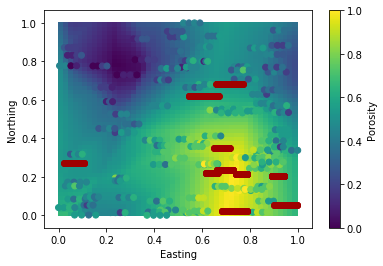

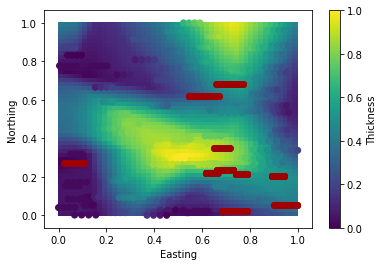

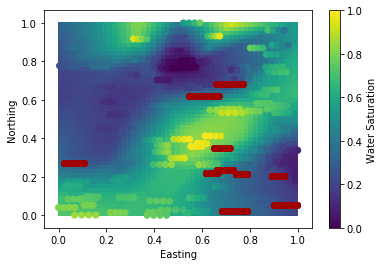

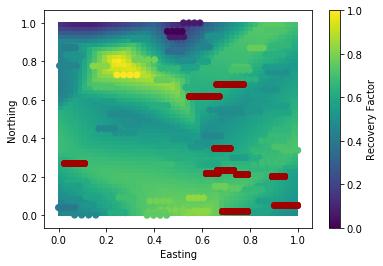

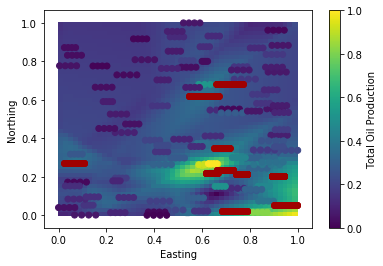

In [29]:
porosityNet.plotSimple()
thicknessNet.plotSimple()
wSaturationNet.plotSimple()
RFNet.plotSimple()
totalOilNet.plotSimple()

# <span style="color:blue">Use the Neural Networks to Populate Well Classes for the Wells we Create</span>

In [30]:
for addedWellClass in addedWellClasses:
    addedWellClass.thickness = thicknessNet.scalarY.inverse_transform(thicknessNet.model.predict(thicknessNet.scalarX.transform(np.array([addedWellClass.easting, addedWellClass.northing]).transpose()))).reshape(-1)
    addedWellClass.porosity = porosityNet.scalarY.inverse_transform(porosityNet.model.predict(porosityNet.scalarX.transform(np.array([addedWellClass.easting, addedWellClass.northing]).transpose()))).reshape(-1)
    addedWellClass.wSaturation = wSaturationNet.scalarY.inverse_transform(wSaturationNet.model.predict(wSaturationNet.scalarX.transform(np.array([addedWellClass.easting, addedWellClass.northing]).transpose()))).reshape(-1)
    addedWellClass.RF = RFNet.scalarY.inverse_transform(RFNet.model.predict(RFNet.scalarX.transform(np.array([addedWellClass.easting, addedWellClass.northing]).transpose()))).reshape(-1).mean()
    totalOil = totalOilNet.scalarY.inverse_transform(totalOilNet.model.predict(totalOilNet.scalarX.transform(np.array([addedWellClass.easting, addedWellClass.northing]).transpose()))).reshape(-1).mean()
    addedWellClass.oilByMonth = np.array(totalOil/12).repeat(12)

# <span style="color:blue">Total OOIP for our 10 wells</span>

In [31]:
np.array([addedWellClass.getOilInPlace() for addedWellClass in addedWellClasses]).sum()

66219915.584408596

# <span style="color:blue">Total RR for our 10 wells</span>

In [40]:
np.array([addedWellClass.getRecoverableReserves() for addedWellClass in addedWellClasses]).sum()

6423685.302589522

# <span style="color:blue">Total EUR for our 10 wells</span>

In [33]:
np.array([addedWellClass.getTotalProduction() for addedWellClass in addedWellClasses]).sum()

37203.791015625